In [1]:
!pip install scorecardpy


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
from dateutil.parser import parse
from datetime import datetime
import scorecardpy as sc
df_train = pd.read_csv('/Users/amirzoyeva/Desktop/scoring/tr_for_students.csv')


target = df_train['def']
df_train.head()

issue_d             purpose addr_state sub_grade home_ownership  \
0  2012-01-01  debt_consolidation         IL        C3           RENT   
1  2013-01-01  debt_consolidation         FL        B4       MORTGAGE   
2  2013-07-01  debt_consolidation         NJ        B5           RENT   
3  2014-03-01  debt_consolidation         MI        C2       MORTGAGE   
4  2013-10-01         credit_card         TX        D2       MORTGAGE   

                     emp_title  installment    dti  funded_amnt  annual_inc  \
0  Chicago Shakespeare Theatre       172.48  16.39         5000     21600.0   
1               Queen of Pawns       674.94  16.31        20000     95000.0   
2                 tek services       809.24  14.01        24000     90000.0   
3            Inventory Control       342.56  14.51        10000     43000.0   
4             Business Analyst       473.58  22.65        13000     62000.0   

   ...  mths_since_recent_inq  delinq_2yrs  chargeoff_within_12_mths  \
0  ...                    NaN            0                         0   
1  ...                    4.0            0                         0   
2  ...                   19.0            0                         0   
3  ...                    5.0            1                         1   
4  ...                    5.0            0                         0   

   num_accts_ever_120_pd  num_tl_90g_dpd_24m  acc_open_past_24mths  \
0                    NaN                 NaN                   NaN   
1                    0.0                 0.0                   4.0   
2                    0.0                 0.0                   5.0   
3                    4.0                 1.0                   3.0   
4                    0.0                 0.0                   5.0   

   avg_cur_bal  tot_hi_cred_lim  delinq_amnt  def  
0          NaN              NaN            0    0  
1      23735.0         153379.0            0    0  
2       4070.0          50834.0            0    0  
3       1127.0          32683.0            0    0  
4       3443.0          59495.0            0    0  

[5 rows x 23 columns]

Для начала посмотрим на общие характеристики датасета 

In [3]:
df_train.describe()

installment           dti   funded_amnt    annual_inc    emp_length  \
count  61169.000000  61169.000000  61169.000000  6.116900e+04  58495.000000   
mean     432.671268     16.782808  14159.664618  7.271755e+04      6.025284   
std      243.699189      7.531950   8181.125909  4.954698e+04      3.597447   
min        4.930000      0.000000   1000.000000  6.695000e+03      0.000000   
25%      257.540000     11.180000   8000.000000  4.500000e+04      3.000000   
50%      382.490000     16.500000  12000.000000  6.250000e+04      6.000000   
75%      565.310000     22.200000  20000.000000  8.800000e+04     10.000000   
max     1408.130000     34.990000  35000.000000  3.900000e+06     10.000000   

               term  inq_last_6mths  mths_since_recent_inq   delinq_2yrs  \
count  61169.000000    61169.000000           47640.000000  61169.000000   
mean      42.276120        0.831254               6.963098      0.259069   
std       10.546991        1.072571               5.848962      0.761321   
min       36.000000        0.000000               0.000000      0.000000   
25%       36.000000        0.000000               2.000000      0.000000   
50%       36.000000        0.000000               6.000000      0.000000   
75%       60.000000        1.000000              10.000000      0.000000   
max       60.000000        8.000000              24.000000     29.000000   

       chargeoff_within_12_mths  num_accts_ever_120_pd  num_tl_90g_dpd_24m  \
count              61169.000000           49228.000000        49228.000000   
mean                   0.006458               0.389920            0.077009   
std                    0.089726               1.065534            0.435189   
min                    0.000000               0.000000            0.000000   
25%                    0.000000               0.000000            0.000000   
50%                    0.000000               0.000000            0.000000   
75%                    0.000000               0.000000            0.000000   
max                    3.000000              29.000000           20.000000   

       acc_open_past_24mths    avg_cur_bal  tot_hi_cred_lim   delinq_amnt  \
count          53283.000000   49224.000000     4.922800e+04  61169.000000   
mean               4.033763   13734.641049     1.671557e+05     12.090634   
std                2.659302   16054.221586     1.699201e+05    720.055058   
min                0.000000       0.000000     0.000000e+00      0.000000   
25%                2.000000    3025.000000     4.550000e+04      0.000000   
50%                4.000000    7847.000000     1.110695e+05      0.000000   
75%                5.000000   19527.000000     2.458785e+05      0.000000   
max               33.000000  354015.000000     9.999999e+06  70076.000000   

                def  
count  61169.000000  
mean       0.159591  
std        0.366229  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61169 entries, 0 to 61168
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   issue_d                   61169 non-null  object 
 1   purpose                   61169 non-null  object 
 2   addr_state                61169 non-null  object 
 3   sub_grade                 61169 non-null  object 
 4   home_ownership            61169 non-null  object 
 5   emp_title                 57304 non-null  object 
 6   installment               61169 non-null  float64
 7   dti                       61169 non-null  float64
 8   funded_amnt               61169 non-null  int64  
 9   annual_inc                61169 non-null  float64
 10  emp_length                58495 non-null  float64
 11  term                      61169 non-null  int64  
 12  inq_last_6mths            61169 non-null  int64  
 13  mths_since_recent_inq     47640 non-null  float64
 14  delinq

## EDA ##

Нашей целевой переменной является переменная def: в ней содержится решение по выдаче или не выдаче кредита, а точнее будет ли у данного клиента дефолт - значение 1 или нет- значение 0.
Посмотрим на распределение результатов в нашей выборке :

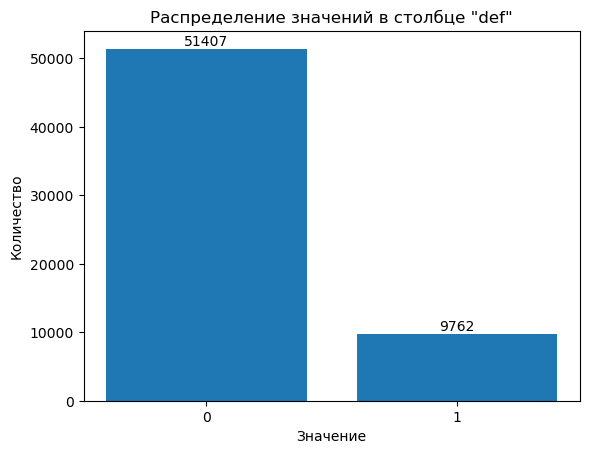

In [5]:

count_def = df_train['def'].value_counts()


plt.bar(count_def.index, count_def.values)

plt.title('Распределение значений в столбце "def"')
plt.xlabel('Значение')
plt.ylabel('Количество')
plt.xticks(count_def.index)

for i, value in enumerate(count_def.values):
    plt.text(i, value, str(value), ha='center', va='bottom')


plt.show()

# Корреляция признаков #

Для начала посмотрим на корреляцию признаков и рассмотрим детальнее самые сильные зависимости и постараемся логически объяснить их для дальнейшего понимания данных

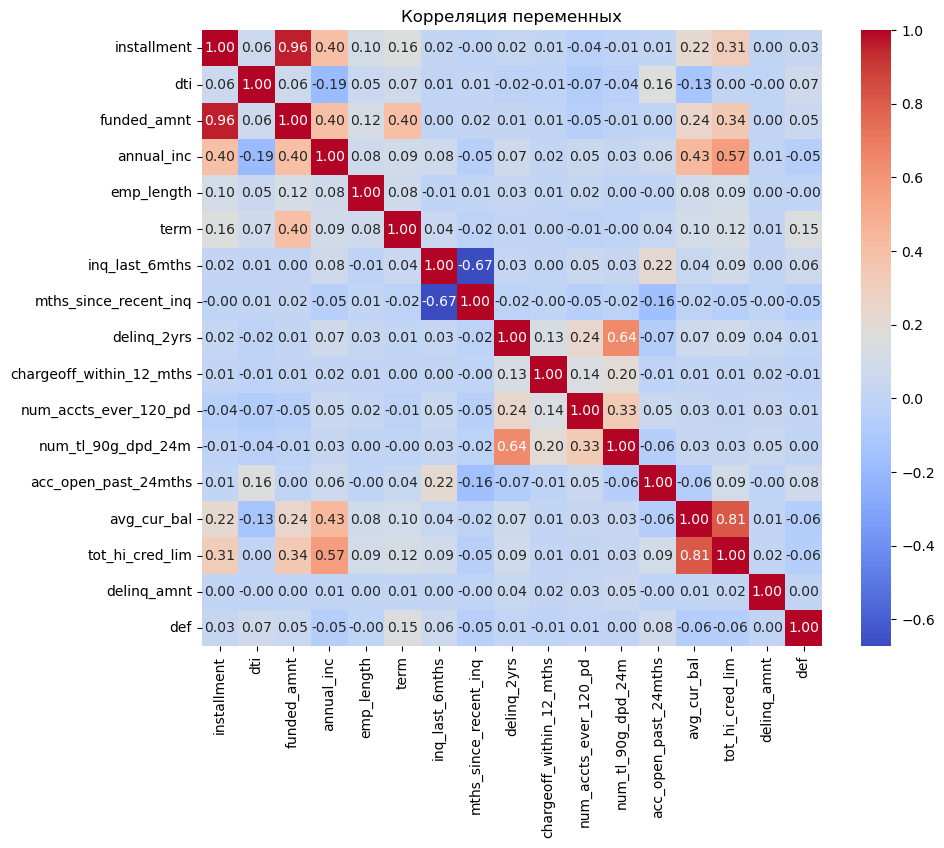

In [6]:
correlation_matrix = df_train.corr()

plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")  
plt.title('Корреляция переменных')  
plt.show()  

Сразу заметна очень высокая корреляция  у переменных:

installment - The monthly payment owed by the borrower if the loan originates.

funded_amnt - The total amount committed to that loan at that point in time.
Посмотрим детальнее на зависимость между этими переменными на диаграммах:


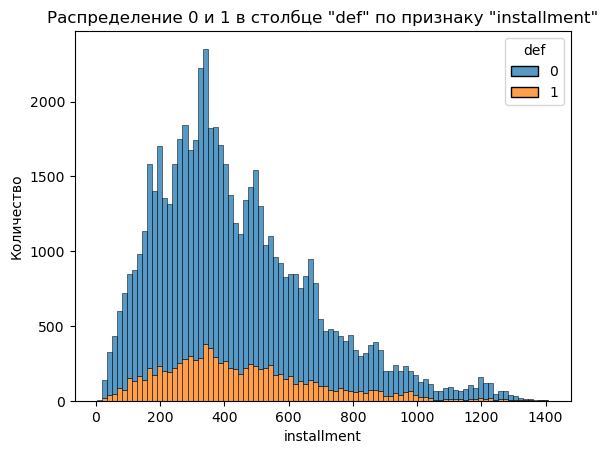

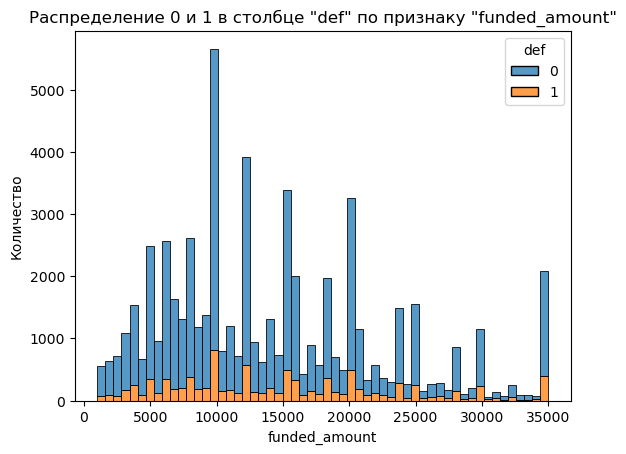

In [7]:
sns.histplot(data=df_train, x='installment', hue='def', multiple='stack')
plt.title('Распределение 0 и 1 в столбце "def" по признаку "installment"')
plt.xlabel('installment')
plt.ylabel('Количество')


plt.show()


sns.histplot(data=df_train, x='funded_amnt', hue='def', multiple='stack')

plt.title('Распределение 0 и 1 в столбце "def" по признаку "funded_amount"')
plt.xlabel('funded_amount')
plt.ylabel('Количество')

plt.show()

<AxesSubplot:xlabel='installment', ylabel='funded_amnt'>

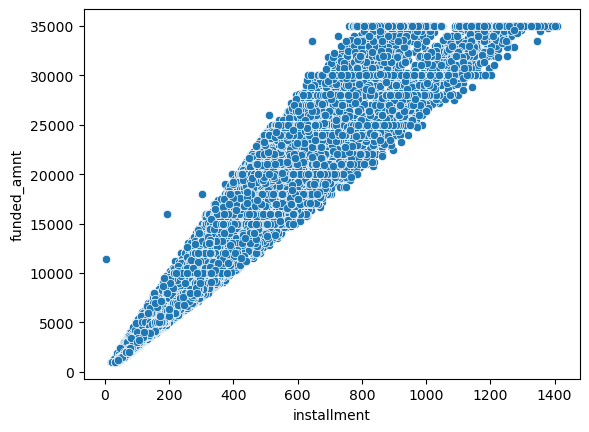

In [8]:
sns.scatterplot(data=df_train, x="installment", y="funded_amnt")

Очевидна строго положительная корреляция между переменными, что в целом очевидно:
чем больше ежемесячный платеж (installment), тем больше вся сумма, выделенная на этот кредит (funded_amnt)

Если исходить из обывательской логики, то можно выдвинуть гипотезу о том, что размер ежемесячного платежа влияет на вероятность дефолта: скорее всего клиент с бОльшим платежом более склонен к невыплате кредита, чем тот, кто взял небольшой кредит

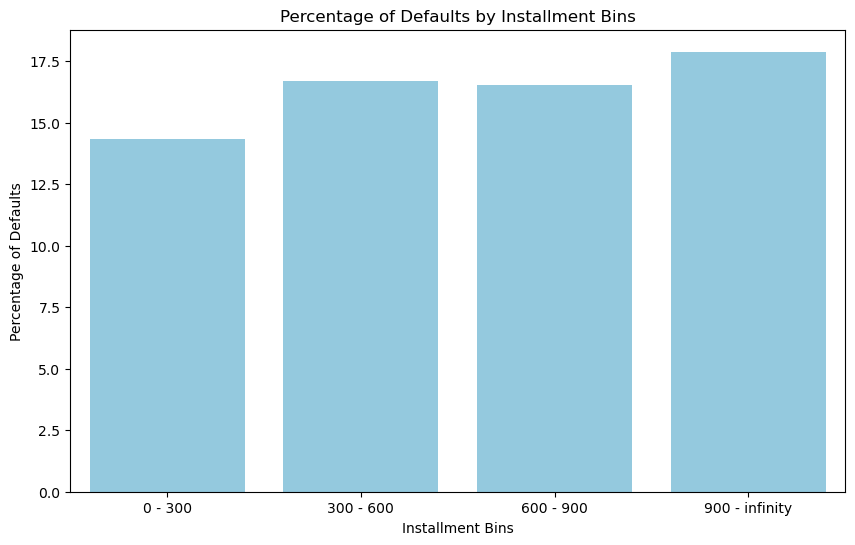

In [9]:
bins = [0, 300, 600, 900, np.inf]
labels = ['0 - 300', '300 - 600', '600 - 900', '900 - infinity']

df_train['installment_bins'] = pd.cut(df_train['installment'], bins=bins, labels=labels, right=False)

count_total = df_train.groupby(['installment_bins']).agg({'installment':'count'}).reset_index()
count_total
count_1 = df_train[df_train['def'] == 1].groupby(['installment_bins']).agg({'installment':'count'}).reset_index()
merged_counts = pd.merge(count_total, count_1, on='installment_bins', suffixes=('_total', '_1'))

merged_counts['percentage'] = (merged_counts['installment_1'] / merged_counts['installment_total']) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x='installment_bins', y='percentage', data=merged_counts, color='skyblue')
plt.xlabel('Installment Bins')
plt.ylabel('Percentage of Defaults')
plt.title('Percentage of Defaults by Installment Bins')


plt.show()
df_train.drop(columns=['installment_bins'], inplace= True)

Однако на данных мы видим, что доля дефолтов (дефолт-рейт) в целом не сильно отличается от  размера ежемесячного платежа

Еще достаточно высокая корреляция наблюдается между переменными tot_hi_credit_lim и avg_cur_bal
Также детально рассмотрим эти переменные

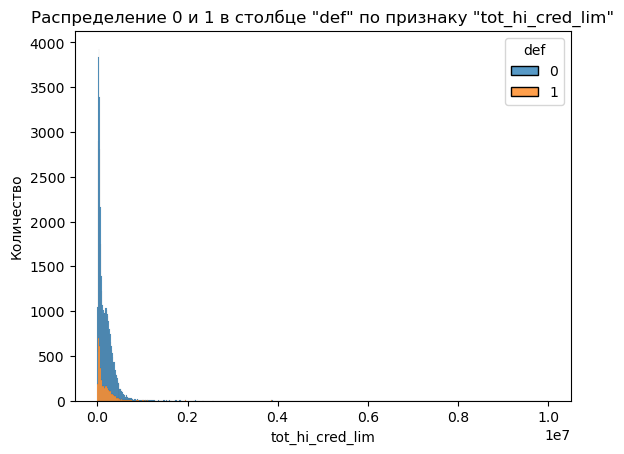

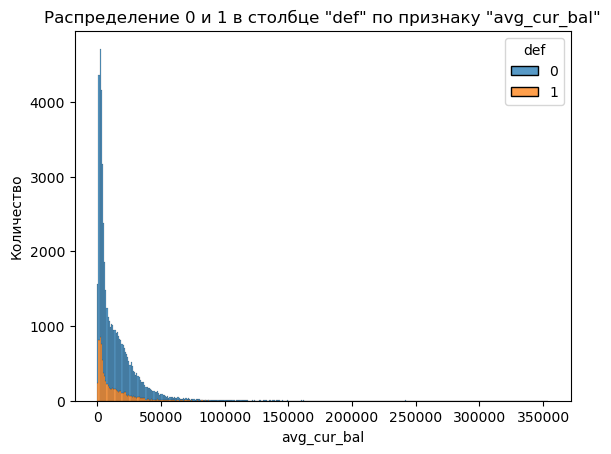

<AxesSubplot:xlabel='tot_hi_cred_lim', ylabel='avg_cur_bal'>

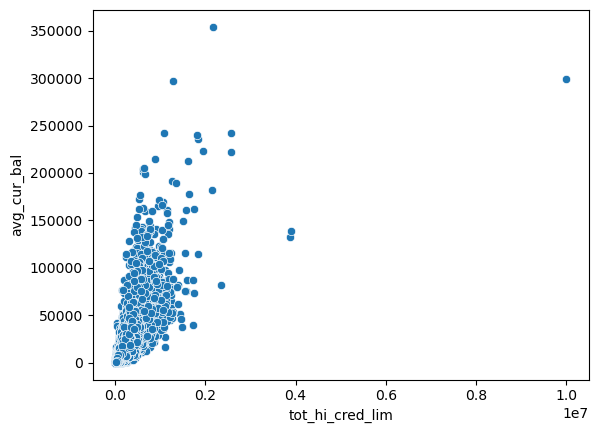

In [10]:
sns.histplot(data=df_train, x='tot_hi_cred_lim', hue='def', multiple='stack')
plt.title('Распределение 0 и 1 в столбце "def" по признаку "tot_hi_cred_lim"')
plt.xlabel('tot_hi_cred_lim')
plt.ylabel('Количество')


plt.show()


sns.histplot(data=df_train, x='avg_cur_bal', hue='def', multiple='stack')

plt.title('Распределение 0 и 1 в столбце "def" по признаку "avg_cur_bal"')
plt.xlabel('avg_cur_bal')
plt.ylabel('Количество')
plt.show()
sns.scatterplot(data=df_train, x='tot_hi_cred_lim', y='avg_cur_bal')


На диаграмме рассеяния видна положительная корреляция переменных, что также достаточно логично.
Кредитный лимит клиента должен прямо положительно зависеть от баланса счетов: если на счетах у человека большое количество средств,то он будет более кредитоспособным


Рассмотрим дефолт рейт по среднему балансу счетов клиента: 
по статистике заметим, что люди с меньшим количеством денег на счетах более склонны к дефолту. Также по распределению дефолт-рейта по этой категории можно сделать предположение, что данная переменная будет обладать большой предсказательной способностью.

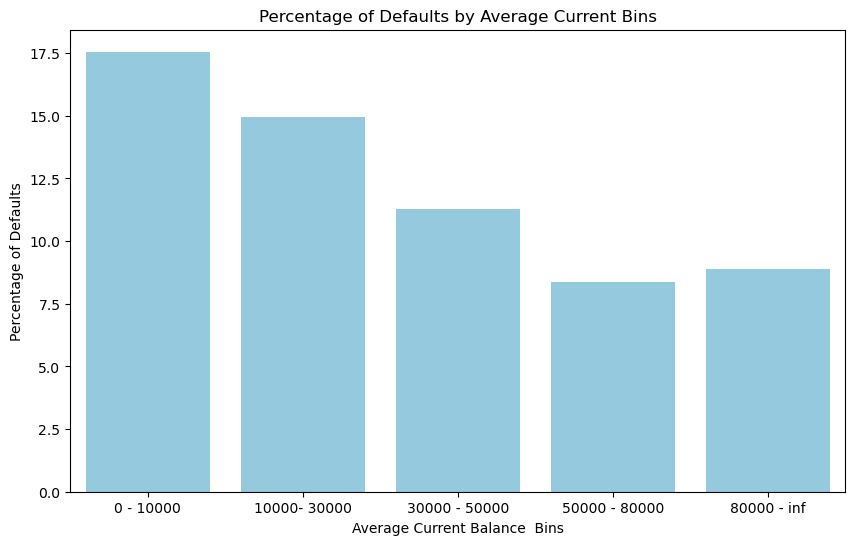

In [11]:
bins = [0, 10000, 30000, 50000, 80000, np.inf]
labels = ['0 - 10000', '10000- 30000', '30000 - 50000', '50000 - 80000', '80000 - inf']

df_train['av_bins'] = pd.cut(df_train['avg_cur_bal'], bins=bins, labels=labels, right=False)

count_total = df_train.groupby(['av_bins']).agg({'avg_cur_bal':'count'}).reset_index()
count_total
count_1 = df_train[df_train['def'] == 1].groupby(['av_bins']).agg({'avg_cur_bal':'count'}).reset_index()
merged_counts = pd.merge(count_total, count_1, on='av_bins', suffixes=('_total', '_1'))

merged_counts['percentage'] = (merged_counts['avg_cur_bal_1'] / merged_counts['avg_cur_bal_total']) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x='av_bins', y='percentage', data=merged_counts, color='skyblue')
plt.xlabel('Average Current Balance  Bins')
plt.ylabel('Percentage of Defaults')
plt.title('Percentage of Defaults by Average Current Bins')


plt.show()
df_train.drop(columns=['av_bins'], inplace= True)

При более детальном рассмотрении еще одной пары переменных, имеющих выделенную корреляцию:
mths_since_recent_inq - Months since most recent inquiry.

inq_last_6mths - The number of inquiries in past 6 months (excluding auto and mortgage inquiries).


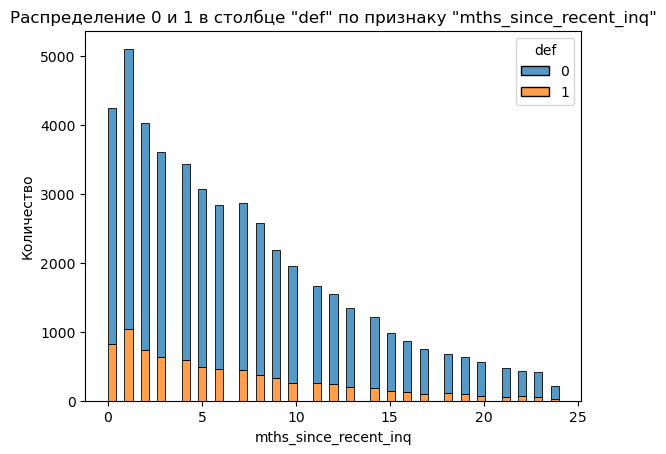

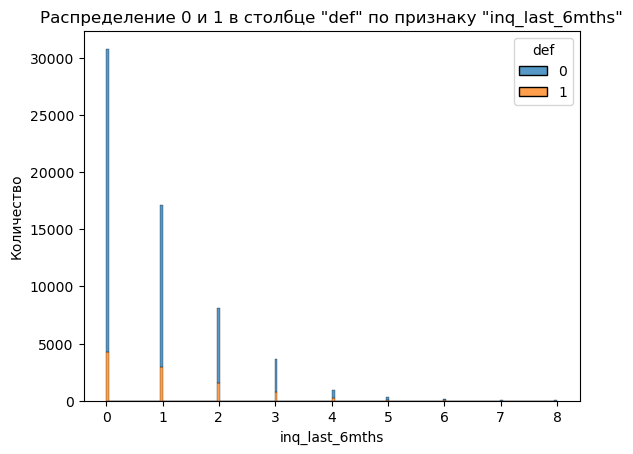

<AxesSubplot:xlabel='inq_last_6mths', ylabel='mths_since_recent_inq'>

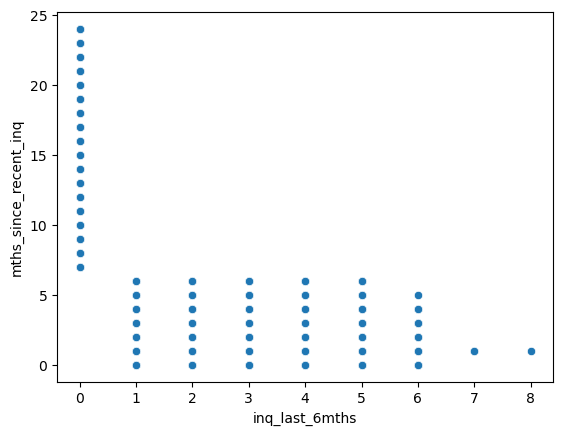

In [12]:
sns.histplot(data=df_train, x='mths_since_recent_inq', hue='def', multiple='stack')
plt.title('Распределение 0 и 1 в столбце "def" по признаку "mths_since_recent_inq"')
plt.xlabel('mths_since_recent_inq')
plt.ylabel('Количество')


plt.show()


sns.histplot(data=df_train, x='inq_last_6mths', hue='def', multiple='stack')

plt.title('Распределение 0 и 1 в столбце "def" по признаку "inq_last_6mths"')
plt.xlabel('inq_last_6mths')
plt.ylabel('Количество')
plt.show()
sns.scatterplot(data=df_train, x='inq_last_6mths', y='mths_since_recent_inq')

Достаточно странная корреляция на первый взгляд, но давайте разберемся детальнее:
inq_last_6mths - обращения за займом в последние 6 месяца, а mths_since_recent_inq - сколько месяцев прошло с последнего запроса. Именно исходя из описания переменных получаем ответ на вопрос  почему при нулевом inq_last_6mnths такие высокие значения mths_since_recent_inq - просто в последние 6 месяцев запроса от клиента не было, поэтому месяцев с последнего запроса намного больше 6. 
Это простое наблюдение будет в дальнейшем использовано при заполнении пропусков в данных.

И завершающая пара коррелированных переменных это "num_tl_90g_dpd_24m" и 'delinq_2yrs'. Рассмотрим их распределение:

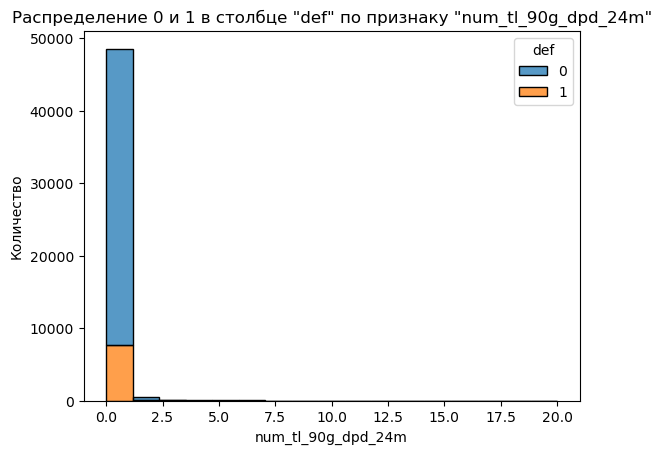

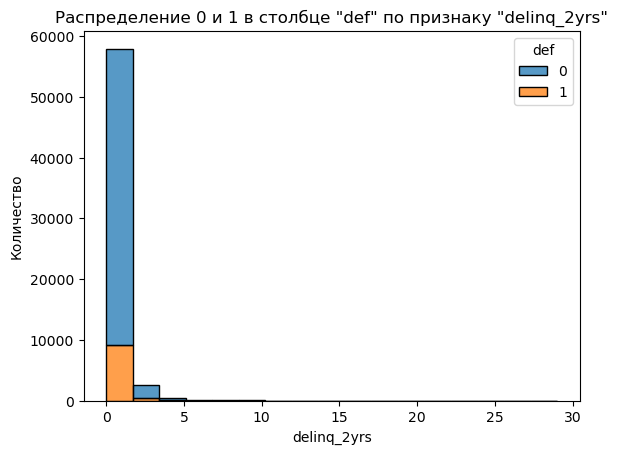

<AxesSubplot:xlabel='num_tl_90g_dpd_24m', ylabel='delinq_2yrs'>

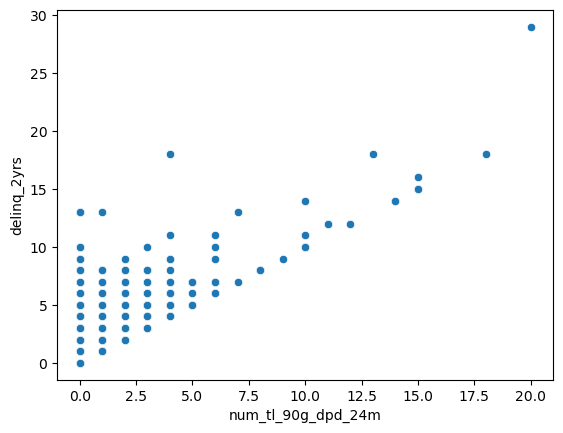

In [13]:
sns.histplot(data=df_train, x='num_tl_90g_dpd_24m', hue='def', multiple='stack')
plt.title('Распределение 0 и 1 в столбце "def" по признаку "num_tl_90g_dpd_24m"')
plt.xlabel('num_tl_90g_dpd_24m')
plt.ylabel('Количество')


plt.show()


sns.histplot(data=df_train, x='delinq_2yrs', hue='def', multiple='stack')

plt.title('Распределение 0 и 1 в столбце "def" по признаку "delinq_2yrs"')
plt.xlabel('delinq_2yrs')
plt.ylabel('Количество')
plt.show()
sns.scatterplot(data=df_train, x='num_tl_90g_dpd_24m', y='delinq_2yrs')

Можем заметить, что эти переменные имеют положительную корреляцию, а также их распределение практически дублирует друг друга. Да и по описанию этих переменных явно видно, что они несут практически один и тот же смысл. 


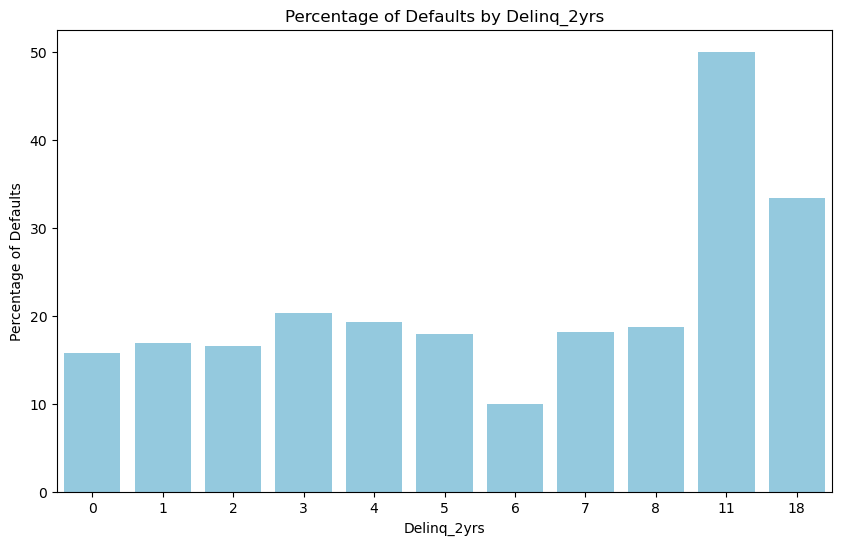

In [14]:


count_total = df_train.groupby(['delinq_2yrs']).agg({'issue_d':'count'}).reset_index()
count_total
count_1 = df_train[df_train['def'] == 1].groupby(['delinq_2yrs']).agg({'issue_d':'count'}).reset_index()

merged_counts = pd.merge(count_total, count_1, on='delinq_2yrs', suffixes=('_total', '_1'))
merged_counts
merged_counts['percentage'] = (merged_counts['issue_d_1'] / merged_counts['issue_d_total']) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x='delinq_2yrs', y='percentage', data=merged_counts, color='skyblue')
plt.xlabel('Delinq_2yrs')
plt.ylabel('Percentage of Defaults')
plt.title('Percentage of Defaults by Delinq_2yrs')


plt.show()


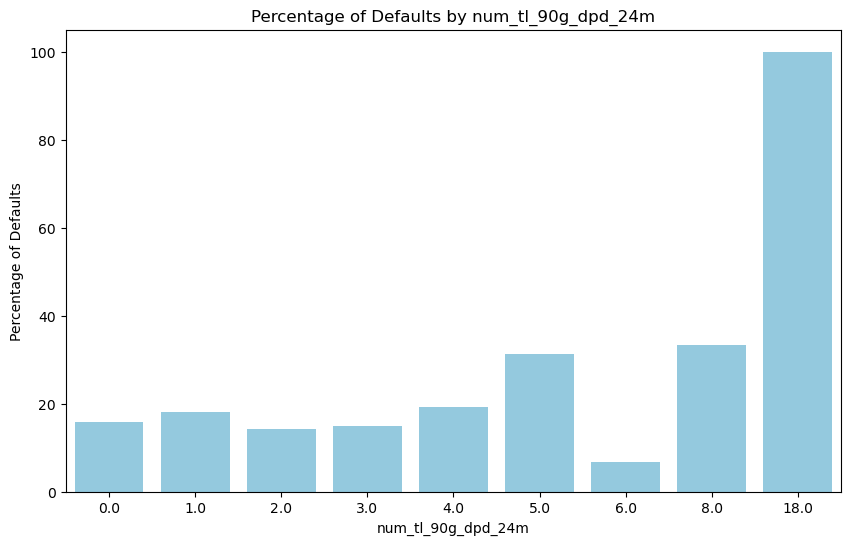

In [15]:
count_total = df_train.groupby(['num_tl_90g_dpd_24m']).agg({'issue_d':'count'}).reset_index()
count_total
count_1 = df_train[df_train['def'] == 1].groupby(['num_tl_90g_dpd_24m']).agg({'issue_d':'count'}).reset_index()

merged_counts = pd.merge(count_total, count_1, on='num_tl_90g_dpd_24m', suffixes=('_total', '_1'))
merged_counts
merged_counts['percentage'] = (merged_counts['issue_d_1'] / merged_counts['issue_d_total']) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x='num_tl_90g_dpd_24m', y='percentage', data=merged_counts, color='skyblue')
plt.xlabel('num_tl_90g_dpd_24m')
plt.ylabel('Percentage of Defaults')
plt.title('Percentage of Defaults by num_tl_90g_dpd_24m')


plt.show()


По диаграммам дефолт-рейтов обнаружим, что в целом распределения на них тоже похожи, поэтому каждая из переменных, скорее всего,  будет иметь высокую предсказательную способность

Из-за вышесказанного попробуем удалить одну из переменных, чтобы не перегружать модель лишними признаками.

In [16]:
df_train.drop(columns=['num_tl_90g_dpd_24m'], inplace = True)


## ISSUE_DATE

Также может быть интересным посмотреть на дефолт рейт относительно времени выдачи кредита: для этого достанем из даты год и месяц, выделим их в отдельные признаки и предположим их предсказательную способность через дефолт-рейт:

In [17]:

df_train['issue_d'] = pd.to_datetime(df_train['issue_d'])
df_train['issue_mont'] = df_train['issue_d'].dt.month
df_train['issue_year'] = df_train['issue_d'].dt.year



In [18]:
# dates = df_train['issue_d']
df_train.drop(columns=['issue_d'], inplace=True)
# df_train['issue_d'] = df_train['issue_d'].astype(str)
# df_train['issue_d'] = pd.to_datetime(df_train['issue_d']).dt.strftime('%Y-%m')

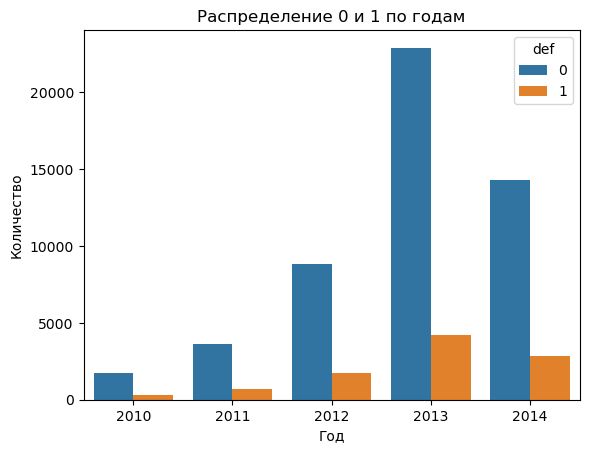

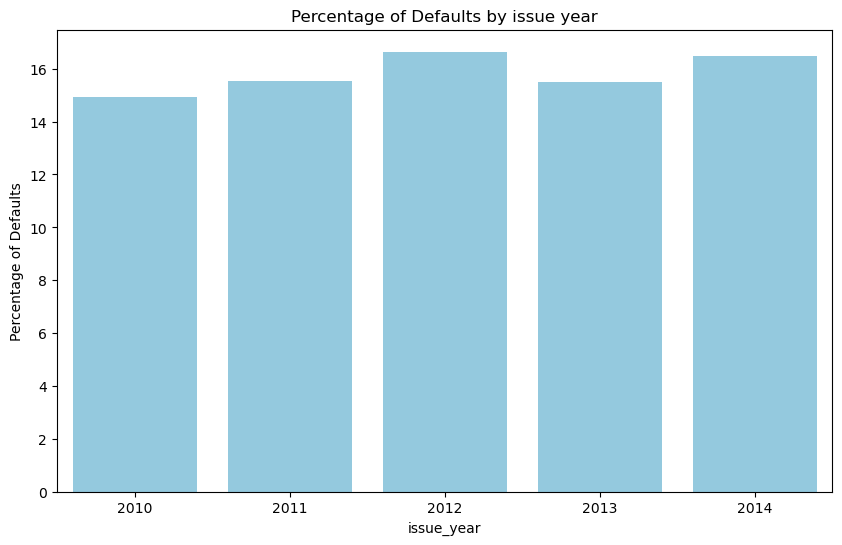

In [19]:
grouped_data = df_train.groupby(['issue_year', 'def']).size().reset_index(name='count')
sns.barplot(data=grouped_data, x='issue_year', y='count', hue='def')
plt.title('Распределение 0 и 1 по годам')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.legend(title='def')  


plt.show()
count_total = df_train.groupby(['issue_year']).size().reset_index(name='count')
count_total
count_1 = df_train[df_train['def'] == 1].groupby(['issue_year']).size().reset_index(name='count')

merged_counts = pd.merge(count_total, count_1, on='issue_year', suffixes=('_total', '_1'))
merged_counts['percentage'] = (merged_counts['count_1'] / merged_counts['count_total']) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x='issue_year', y='percentage', data=merged_counts, color='skyblue')
plt.xlabel('issue_year')
plt.ylabel('Percentage of Defaults')
plt.title('Percentage of Defaults by issue year')


plt.show()


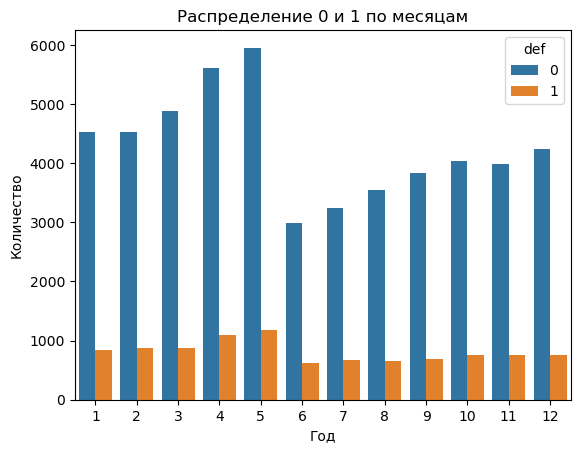

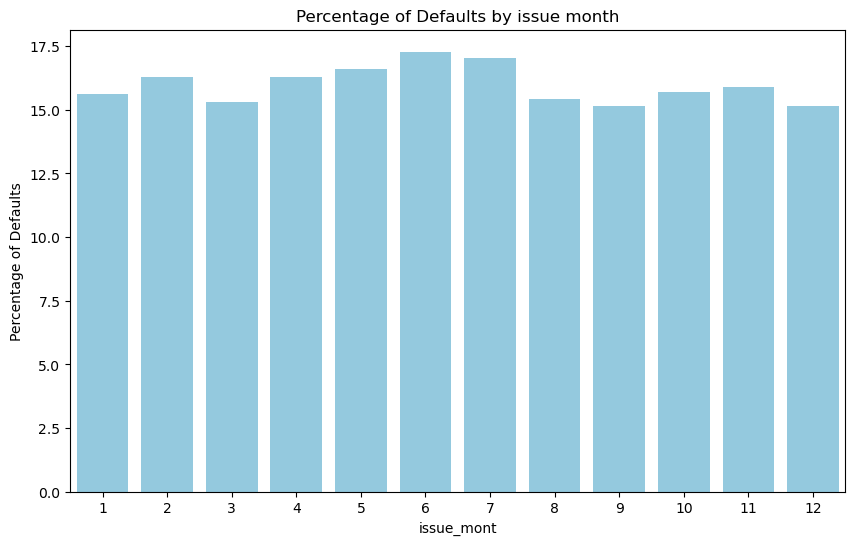

In [20]:
grouped_data = df_train.groupby(['issue_mont', 'def']).size().reset_index(name='count')
sns.barplot(data=grouped_data, x='issue_mont', y='count', hue='def')
plt.title('Распределение 0 и 1 по месяцам')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.legend(title='def')  


plt.show()
count_total = df_train.groupby(['issue_mont']).size().reset_index(name='count')
count_total
count_1 = df_train[df_train['def'] == 1].groupby(['issue_mont']).size().reset_index(name='count')

merged_counts = pd.merge(count_total, count_1, on='issue_mont', suffixes=('_total', '_1'))
merged_counts['percentage'] = (merged_counts['count_1'] / merged_counts['count_total']) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x='issue_mont', y='percentage', data=merged_counts, color='skyblue')
plt.xlabel('issue_mont')
plt.ylabel('Percentage of Defaults')
plt.title('Percentage of Defaults by issue month')


plt.show()

Как мы видим, дефолт рейт особо не меняется по месяцам и годам, значит эти два признака не будут слишком информативными. В целом это объяснимо: просто дата выдачи кредита не может сильно влиять на заемщика. Для нас было бы полезным, если бы в датасете присутствовала, например, дата последнего платежа и дата ориентировочного закрытия кредита, а просто дата обращения в банк не может стать полезной информацией для модели: банку точно не стоит принимать решение исходя из того, в какое время года клиент обратился за займом.
Однако, можно было предположить, что количесвто дефолтов может объяснятся через макроэкономические события отдельного года, но в нашем датасете нет, например, даннных о 2008 годе, когда имел место мировой экономический кризис, а представлены лишь данные об относительно спокойном периоде с 2010 по 2014 год.

In [21]:
df_train.drop(columns=['issue_year'], inplace = True)
df_train.drop(columns=['issue_mont'], inplace = True)


## SUB_GRADE

Sub-grade - кредитный рейтинг, присвоенный компанией Lending Club по своим внутренним правилам. Попробуем оценить ее ожидаемую информативность

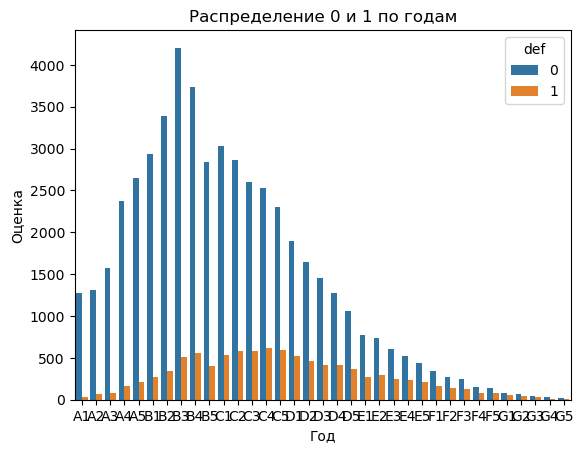

In [22]:
grouped_data = df_train.groupby(['sub_grade', 'def']).size().reset_index(name='count')
sns.barplot(data=grouped_data, x='sub_grade', y='count', hue='def', )
plt.title('Распределение 0 и 1 по годам')
plt.xlabel('Год')
plt.ylabel('Оценка')
plt.legend(title='def')  


plt.show()


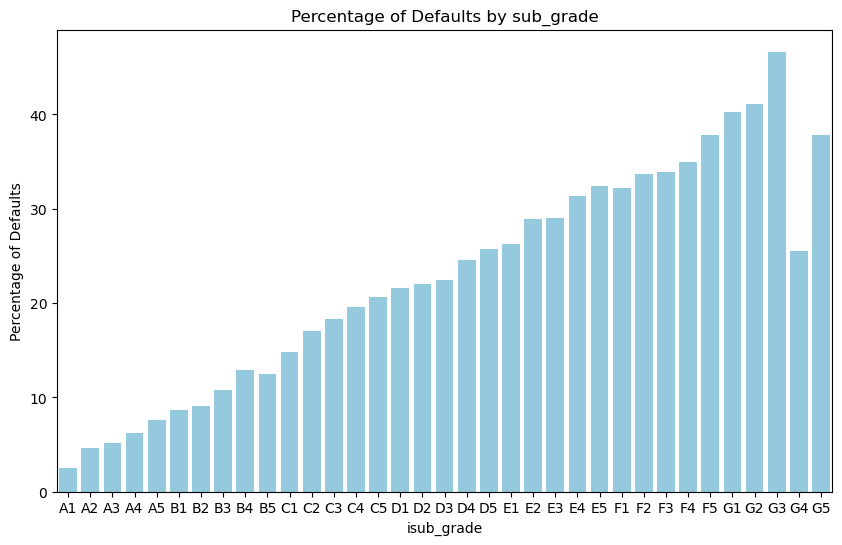

In [23]:
count_total = df_train.groupby(['sub_grade']).size().reset_index(name='count')
count_total
count_1 = df_train[df_train['def'] == 1].groupby(['sub_grade']).size().reset_index(name='count')

merged_counts = pd.merge(count_total, count_1, on='sub_grade', suffixes=('_total', '_1'))
merged_counts['percentage'] = (merged_counts['count_1'] / merged_counts['count_total']) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x='sub_grade', y='percentage', data=merged_counts, color='skyblue')
plt.xlabel('isub_grade')
plt.ylabel('Percentage of Defaults')
plt.title('Percentage of Defaults by sub_grade')


plt.show()

Несложно заметить, что эта переменная крайне информативна для обучения модели, так как по статистике кредиты оцененные буквами E, F, G, более вероятно окажутся дефолтными.

Посмотрим на распределения категориальных и непрерывных переменных отдельно:

In [24]:
categorical = []
continuous = []
for i in df_train.columns:
    if ((df_train[i].dtype == int) or (df_train[i].dtype == float)):
        continuous.append(i)
    else:
        categorical.append(i)

In [25]:
updatemenu = [dict()]
buttons = []
fig_cat= go.Figure()
data = []  

for i in categorical[1:]:
    trace = px.histogram(df_train[i]).data[0]
    trace.visible = False
    data.append(trace) 

fig_cat.add_traces(data) 
for i, col in enumerate(categorical[1:]):
    visibles = [False] * len(categorical[1:])
    visibles[i] = True
    buttons.append(dict(method='restyle',
                        label=col,
                        args=[{"visible": visibles}]
                        ))

updatemenu[0]['buttons'] = buttons
updatemenu[0]['direction'] = 'down'
updatemenu[0]['showactive'] = True

fig_cat.update_layout(showlegend=True, updatemenus=updatemenu)
fig_cat.update_layout(
    title={
        "text": "Distribution of categorical variables",
        "x": 0.5
    },
    xaxis_title="Value",
    yaxis_title="Number of values"
)
fig_cat.show()

На основе гистограмм с распределениями можем сделать вывод о некоторых категориальных переменных и рассмотрим их отдельно:

In [26]:
print("Количество уникальных значений в столбце 'emp_title':",df_train['emp_title'].nunique())


Количество уникальных значений в столбце 'emp_title': 38576


Как можно заметить, в столбце 'emp_title' достаточно много уникальных значений и эта переменная является категориальной. Кажется, что нет особого смысла кодировать каждую профессию отдельным числом, так как их достаточно много. На следующем ниже графике видно, что самое большое количество появления одной той же професси - всего лишь 500, а всего данных около 62 000. 
В целом для нашего анализа не столь важно название профессии, сколько факт того, поделился ли с банком этими данными клиент, а также его стаж работы и доход. Поэтому в перспективе можно рассмотреть вариант удаления переменной с названием профессии.

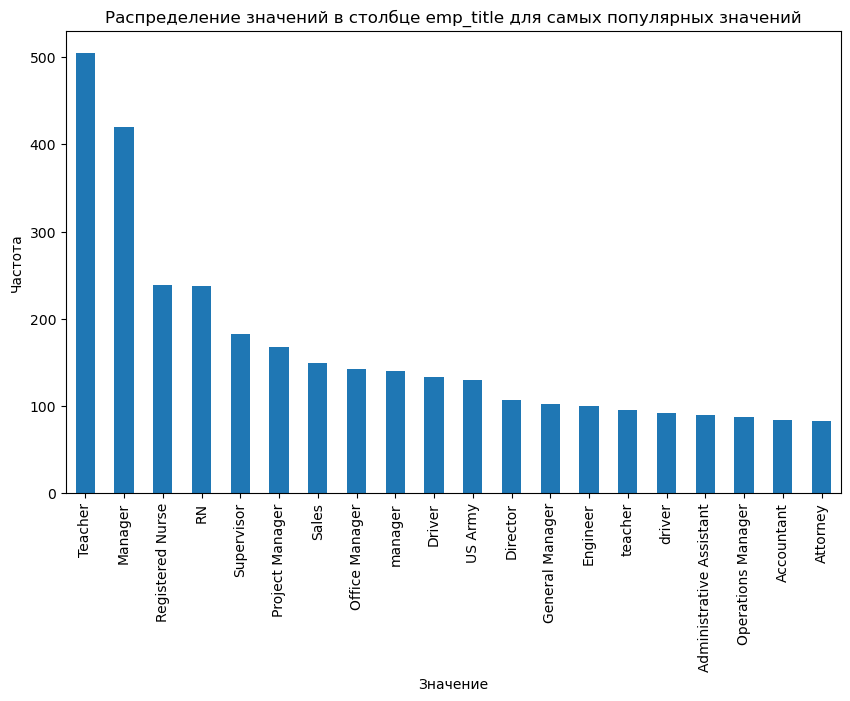

In [27]:

plt.figure(figsize=(10, 6)) 
df_train['emp_title'].value_counts().nlargest(20).plot(kind='bar')  
plt.title('Распределение значений в столбце emp_title для самых популярных значений')  
plt.xlabel('Значение') 
plt.ylabel('Частота') 
plt.show()  



Теперь рассмотрим распределение доли тех, кто "дефолтнул", а кто - нет в зависмости от стажа работы:


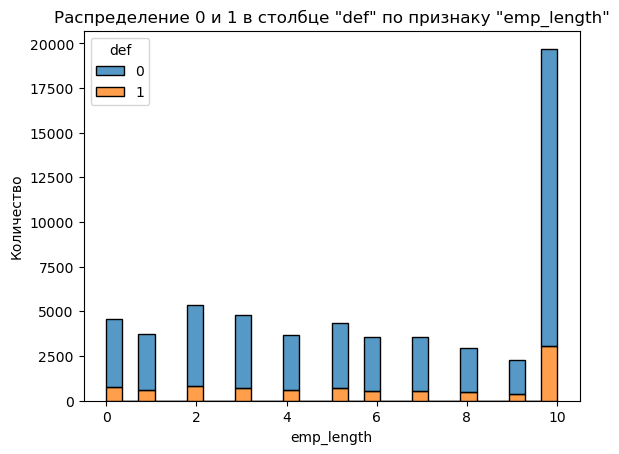

In [28]:

sns.histplot(data=df_train, x='emp_length', hue='def', multiple='stack')

plt.title('Распределение 0 и 1 в столбце "def" по признаку "emp_length"')
plt.xlabel('emp_length')
plt.ylabel('Количество')

plt.show()



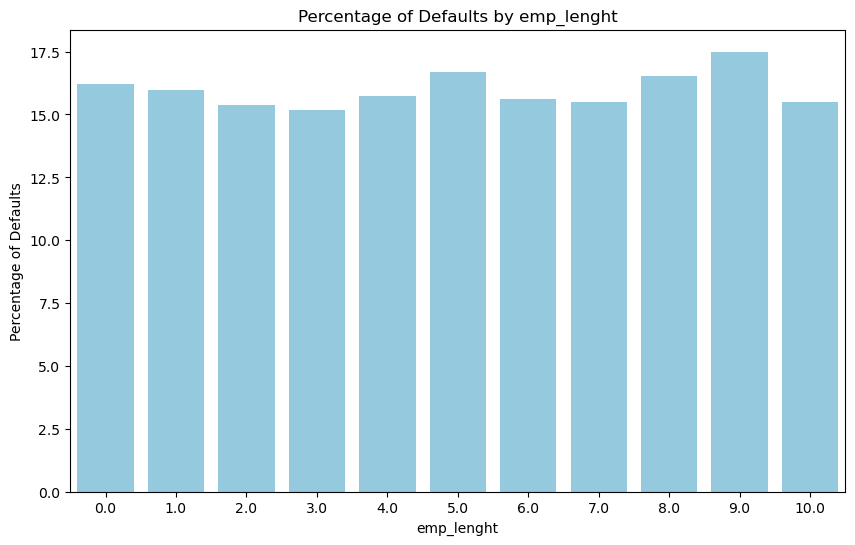

In [29]:
count_total = df_train.groupby(['emp_length']).size().reset_index(name='count')
count_total
count_1 = df_train[df_train['def'] == 1].groupby(['emp_length']).size().reset_index(name='count')

merged_counts = pd.merge(count_total, count_1, on='emp_length', suffixes=('_total', '_1'))
merged_counts['percentage'] = (merged_counts['count_1'] / merged_counts['count_total']) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x='emp_length', y='percentage', data=merged_counts, color='skyblue')
plt.xlabel('emp_lenght')
plt.ylabel('Percentage of Defaults')
plt.title('Percentage of Defaults by emp_lenght')


plt.show()



Парадоксально, но кажется, что на нашей выборке срок стажа на работе не будет сильно информативной, если судить по дефолт-рейту

In [30]:
df_train.drop(columns = ['emp_length'], inplace =True )


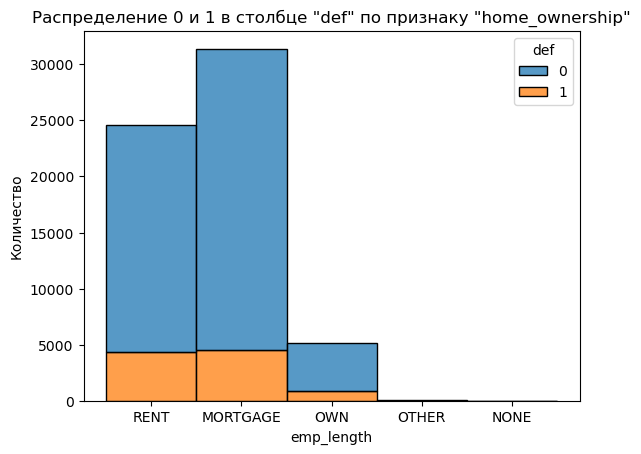

In [31]:
sns.histplot(data=df_train, x='home_ownership', hue='def', multiple='stack')

plt.title('Распределение 0 и 1 в столбце "def" по признаку "home_ownership"')
plt.xlabel('emp_length')
plt.ylabel('Количество')

plt.show()

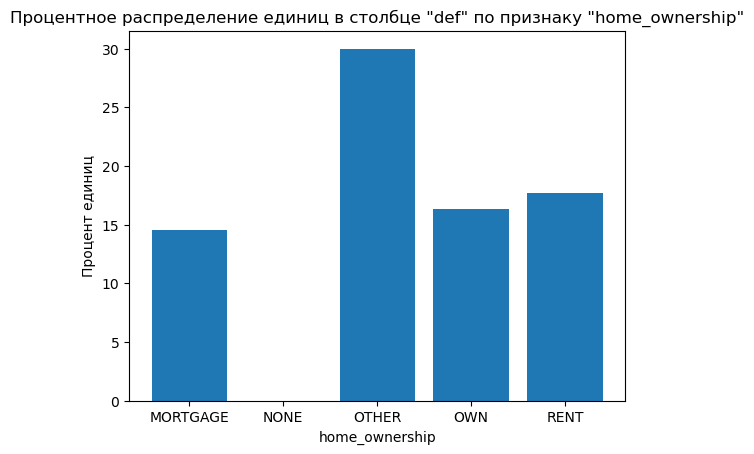

In [32]:
grouped_data = df_train.groupby(['home_ownership', 'def']).size().unstack()


total_counts = grouped_data.sum(axis=1)
percentage_1 = (grouped_data[1] / total_counts) * 100


plt.bar(percentage_1.index, percentage_1.values)


plt.title('Процентное распределение единиц в столбце "def" по признаку "home_ownership"')
plt.xlabel('home_ownership')
plt.ylabel('Процент единиц')

plt.show()

В распределении переменной "Home_ownership" можем заметить две категории, которые в целом можно объединить по смыслу:


In [33]:
df_train['home_ownership'] = df_train['home_ownership'].replace(['OTHER', 'NONE'], 'OTHER')


## DATA PREPROCESSING ##

В нашем датасете всего 22 переменных, поэтому есть смысл оценить важность каждой из них для нашего анализа через EDA.
Посмотрим, в каких категориях есть пропуски до заполнения

In [34]:

missing_values_before = df_train.isna().sum()
print("Пропуски до заполнения:")
print(missing_values_before)



Пропуски до заполнения:
purpose                         0
addr_state                      0
sub_grade                       0
home_ownership                  0
emp_title                    3865
installment                     0
dti                             0
funded_amnt                     0
annual_inc                      0
term                            0
inq_last_6mths                  0
mths_since_recent_inq       13529
delinq_2yrs                     0
chargeoff_within_12_mths        0
num_accts_ever_120_pd       11941
acc_open_past_24mths         7886
avg_cur_bal                 11945
tot_hi_cred_lim             11941
delinq_amnt                     0
def                             0
dtype: int64


Заметим, что достаточное количество пропусков содержатся в столбцах "emp_title" и "emp_lenght". Можно предположить, что эти данные о своем трудоустройстве клиенты скрыли намеренно: поэтому нельзя однозначно исключить эти переменные, так как пропуск в данных может свидетельствовать об отсутствии работы или ее непостоянности, что может сильно повлиять на решение по выдаче кредита.
Теперь необходимо принять решение, как заполнить данные пропуски:

Как мы ранеее установили, имеет смысл  удалить перемеенную "emp_title", так как такое большое количество уникальных значений не позволяет как-то закодировать эту переменную или создать dummies, но создадим вспомогательный столбец в котором установим значение 1, если имел место пропуск в "emp_title", и 0 в обратном случае.

Можно предположить, что пропуски в столбце 'mths_since_recent_inq' означают, что люди вообще не делали запрос на займ.Поэтому эти пропуски заполним максимальным  значением в столбце, так как, как мы установили в EDA, почему при нулевом inq_last_6mnths такие высокие значения mths_since_recent_inq - просто в последние 6 месяцев запроса от клиента не было, поэтому месяцев с последнего запроса намного больше 6. В целом, как мы установили максимальное значение в столбце - около 24 месяцев, что кажется, является достаточным сроком для повторного запроса на кредит от среднего клиента.


с остальными переменными поступим так: num_accts_ever_120_pd , avg_cur_bal ,tot_hi_cred_lim  заполним средним значением столбцов, которые являются вторым по показателю корреляции для каждого из них, чтобы не создавать еще большую зависимость для переменной с максимальной корреляцией


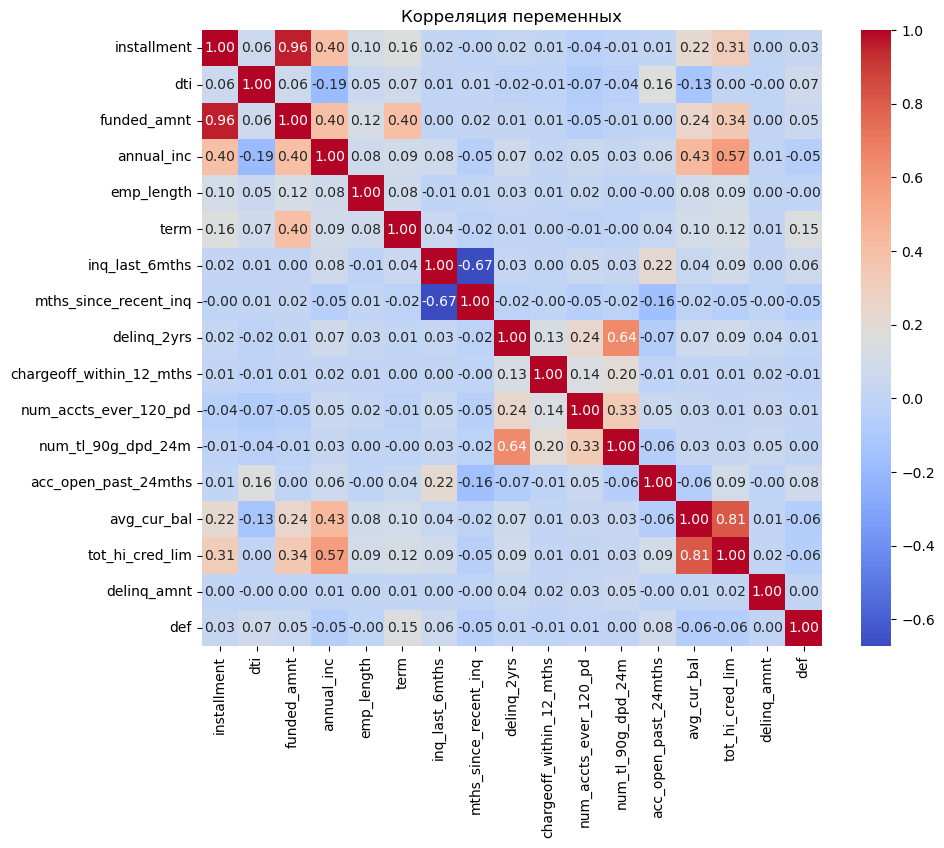

In [35]:
plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")  
plt.title('Корреляция переменных')  
plt.show() 

In [36]:
# Заполняем пропуски
df_train['emp_title_filled'] = np.where(df_train['emp_title'].isna(), 1, 0)
df_train.drop(columns = ['emp_title'], inplace=True)


In [37]:
df_train['num_accts_ever_120_pd'].fillna(df_train['delinq_2yrs'].mean(), inplace=True)
df_train['avg_cur_bal'].fillna(df_train['annual_inc'].mean(), inplace=True)
df_train['tot_hi_cred_lim'].fillna(df_train['annual_inc'].mean(), inplace=True)
df_train['acc_open_past_24mths_nan'] = np.where(df_train['acc_open_past_24mths'].isna(), 1, 0)
df_train['acc_open_past_24mths'].fillna(0, inplace = True)
df_train['mths_since_recent_inq_nan'] = np.where(df_train['mths_since_recent_inq'].isna(), 1, 0)
df_train['mths_since_recent_inq'].fillna(df_train['mths_since_recent_inq'].max(), inplace = True)



In [38]:
# Посмотрим, в каких категориях остались пропуски после заполнения
missing_values_after = df_train.isna().sum()
print("Пропуски после заполнения:")
print(missing_values_after)

Пропуски после заполнения:
purpose                      0
addr_state                   0
sub_grade                    0
home_ownership               0
installment                  0
dti                          0
funded_amnt                  0
annual_inc                   0
term                         0
inq_last_6mths               0
mths_since_recent_inq        0
delinq_2yrs                  0
chargeoff_within_12_mths     0
num_accts_ever_120_pd        0
acc_open_past_24mths         0
avg_cur_bal                  0
tot_hi_cred_lim              0
delinq_amnt                  0
def                          0
emp_title_filled             0
acc_open_past_24mths_nan     0
mths_since_recent_inq_nan    0
dtype: int64


In [39]:
df_train.head()

purpose addr_state sub_grade home_ownership  installment    dti  \
0  debt_consolidation         IL        C3           RENT       172.48  16.39   
1  debt_consolidation         FL        B4       MORTGAGE       674.94  16.31   
2  debt_consolidation         NJ        B5           RENT       809.24  14.01   
3  debt_consolidation         MI        C2       MORTGAGE       342.56  14.51   
4         credit_card         TX        D2       MORTGAGE       473.58  22.65   

   funded_amnt  annual_inc  term  inq_last_6mths  ...  \
0         5000     21600.0    36               3  ...   
1        20000     95000.0    36               1  ...   
2        24000     90000.0    36               0  ...   
3        10000     43000.0    36               1  ...   
4        13000     62000.0    36               3  ...   

   chargeoff_within_12_mths  num_accts_ever_120_pd  acc_open_past_24mths  \
0                         0               0.259069                   0.0   
1                         0               0.000000                   4.0   
2                         0               0.000000                   5.0   
3                         1               4.000000                   3.0   
4                         0               0.000000                   5.0   

    avg_cur_bal  tot_hi_cred_lim  delinq_amnt  def  emp_title_filled  \
0  72717.547061     72717.547061            0    0                 0   
1  23735.000000    153379.000000            0    0                 0   
2   4070.000000     50834.000000            0    0                 0   
3   1127.000000     32683.000000            0    0                 0   
4   3443.000000     59495.000000            0    0                 0   

   acc_open_past_24mths_nan  mths_since_recent_inq_nan  
0                         1                          1  
1                         0                          0  
2                         0                          0  
3                         0                          0  
4                         0                          0  

[5 rows x 22 columns]

# Теперь попробуем сгенерировать некоторые новые признаки

Попробуем вернуться к зависимости между годовым доходом и месячным платежом, который полагается заемщику в случае выдачи займа. В новый признак запишем процент, который будет занимать месячный платеж от среднего месячного дохода 

In [40]:
df_train['perc_month'] = (df_train['installment']/(df_train['annual_inc']/12))*100


Заранее сохраню копию датасета для WOE-преобразований, так как woe будет плохо работать c dummie переменными

In [41]:
df_train_woe = df_train


Так же сгенерируем новые признаки на основе категориальных перменных:
нам неудобно работать с переменными, которые представлены строками, поэтому нам необходимо создать фиктивные переменные.
Addr_state, purpose, sub_grade и emp_title мы преобразуем так: с помощью category_encoders построим биекцию из множества значений, принимаемых переменной в множество натуральных чисел

In [42]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['purpose', 'addr_state', 'sub_grade'])
df_train = encoder.fit_transform(df_train)


In [43]:
df_train_dummies = pd.get_dummies(df_train['home_ownership'], prefix='home_ownership')

df_train = pd.concat([df_train, df_train_dummies], axis=1)


df_train.drop('home_ownership', axis=1, inplace=True)



In [44]:
df_train

purpose  addr_state  sub_grade  installment    dti  funded_amnt  \
0            1           1          1       172.48  16.39         5000   
1            1           2          2       674.94  16.31        20000   
2            1           3          3       809.24  14.01        24000   
3            1           4          4       342.56  14.51        10000   
4            2           5          5       473.58  22.65        13000   
...        ...         ...        ...          ...    ...          ...   
61164        1           7          6       583.47   7.96        18375   
61165        1           5          6       341.72  20.97        16500   
61166        1           2          8       245.06  33.65         6800   
61167        1           5          3       107.73  18.48         3250   
61168        7           1         22        76.80  22.33         2000   

       annual_inc  term  inq_last_6mths  mths_since_recent_inq  ...  \
0         21600.0    36               3                   24.0  ...   
1         95000.0    36               1                    4.0  ...   
2         90000.0    36               0                   19.0  ...   
3         43000.0    36               1                    5.0  ...   
4         62000.0    36               3                    5.0  ...   
...           ...   ...             ...                    ...  ...   
61164    133325.0    36               0                   24.0  ...   
61165     82000.0    60               2                    1.0  ...   
61166     27000.0    36               1                    5.0  ...   
61167     58000.0    36               0                   24.0  ...   
61168     28000.0    36               1                    6.0  ...   

       delinq_amnt  def  emp_title_filled  acc_open_past_24mths_nan  \
0                0    0                 0                         1   
1                0    0                 0                         0   
2                0    0                 0                         0   
3                0    0                 0                         0   
4                0    0                 0                         0   
...            ...  ...               ...                       ...   
61164            0    0                 0                         0   
61165            0    0                 0                         0   
61166            0    0                 0                         0   
61167            0    0                 0                         1   
61168            0    0                 0                         0   

       mths_since_recent_inq_nan  perc_month  home_ownership_MORTGAGE  \
0                              1    9.582222                        0   
1                              0    8.525558                        1   
2                              0   10.789867                        0   
3                              0    9.559814                        1   
4                              0    9.166065                        1   
...                          ...         ...                      ...   
61164                          1    5.251558                        0   
61165                          0    5.000780                        1   
61166                          0   10.891556                        0   
61167                          1    2.228897                        1   
61168                          0    3.291429                        0   

       home_ownership_OTHER  home_ownership_OWN  home_ownership_RENT  
0                         0                   0                    1  
1                         0                   0                    0  
2                         0                   0                    1  
3                         0                   0                    0  
4                         0                   0                    0  
...                     ...                 ...                  ...  
61164                     0           

## Разделим на валидационную и тренировочную выборки ##

In [45]:
from sklearn.model_selection import train_test_split
target_train  = df_train['def']
df_train_lg = df_train.drop(['def'], axis=1)

X_train, X_val, y_train, y_val = train_test_split(df_train_lg, target_train, test_size=0.2, random_state=42)


## Масштабирование  и обучение модели ##

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

Xtr_scaled = scaler.fit_transform(X_train)
Xval_scaled = scaler.transform(X_val)

accuracy_score= 0.676
recall_score = 0.554
precision_score = 0.259


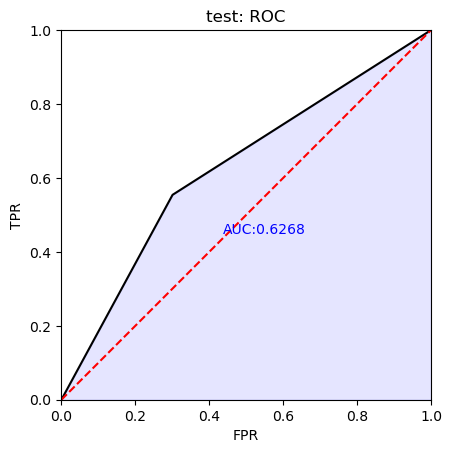

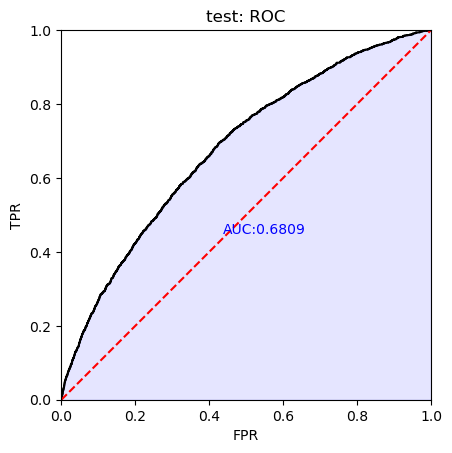

Gini coeff test  = 0.3617


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve
from sklearn.metrics import f1_score, classification_report
model =  LogisticRegression(random_state=0, penalty='l2')
model.fit(Xtr_scaled, y_train)
y_pred = model.predict(Xval_scaled)
lr_probs_val = model.predict_proba(Xval_scaled)
lr_probs_val = lr_probs_val[:, 1]
y_pred = 1*(lr_probs_val >= 0.17)
print('accuracy_score= {:.3f}'.format(accuracy_score(y_val, y_pred)))
print('recall_score = {:.3f}'.format(recall_score(y_val, y_pred)))
print('precision_score = {:.3f}'.format(precision_score(y_val, y_pred)))


test_perf = sc.perf_eva(y_val,y_pred ,plot_type = ["roc"], title = "test")
test_perf = sc.perf_eva(y_val,lr_probs_val ,plot_type = ["roc"], title = "test")

print('Gini coeff test  =' , test_perf['Gini'])

In [48]:
df_train_woe

purpose addr_state sub_grade home_ownership  installment  \
0      debt_consolidation         IL        C3           RENT       172.48   
1      debt_consolidation         FL        B4       MORTGAGE       674.94   
2      debt_consolidation         NJ        B5           RENT       809.24   
3      debt_consolidation         MI        C2       MORTGAGE       342.56   
4             credit_card         TX        D2       MORTGAGE       473.58   
...                   ...        ...       ...            ...          ...   
61164  debt_consolidation         CA        A5           RENT       583.47   
61165  debt_consolidation         TX        A5       MORTGAGE       341.72   
61166  debt_consolidation         FL        D1           RENT       245.06   
61167  debt_consolidation         TX        B5       MORTGAGE       107.73   
61168               other         IL        E3           RENT        76.80   

         dti  funded_amnt  annual_inc  term  inq_last_6mths  ...  \
0      16.39         5000     21600.0    36               3  ...   
1      16.31        20000     95000.0    36               1  ...   
2      14.01        24000     90000.0    36               0  ...   
3      14.51        10000     43000.0    36               1  ...   
4      22.65        13000     62000.0    36               3  ...   
...      ...          ...         ...   ...             ...  ...   
61164   7.96        18375    133325.0    36               0  ...   
61165  20.97        16500     82000.0    60               2  ...   
61166  33.65         6800     27000.0    36               1  ...   
61167  18.48         3250     58000.0    36               0  ...   
61168  22.33         2000     28000.0    36               1  ...   

       num_accts_ever_120_pd  acc_open_past_24mths   avg_cur_bal  \
0                   0.259069                   0.0  72717.547061   
1                   0.000000                   4.0  23735.000000   
2                   0.000000                   5.0   4070.000000   
3                   4.000000                   3.0   1127.000000   
4                   0.000000                   5.0   3443.000000   
...                      ...                   ...           ...   
61164               1.000000                   1.0   5278.000000   
61165               0.000000                   3.0  18594.000000   
61166               1.000000                   5.0   2093.000000   
61167               0.259069                   0.0  72717.547061   
61168               0.000000                   5.0   1302.000000   

       tot_hi_cred_lim  delinq_amnt  def  emp_title_filled  \
0         72717.547061            0    0                 0   
1        153379.000000            0    0                 0   
2         50834.000000            0    0                 0   
3         32683.000000            0    0                 0   
4         59495.000000            0    0                 0   
...                ...          ...  ...               ...   
61164     48557.000000            0    0                 0   
61165    333493.000000            0    0                 0   
61166     36095.000000            0    0                 0   
61167     72717.547061            0    0                 0   
61168     17432.000000            0    0                 0   

       acc_open_past_24mths_nan  mths_since_recent_inq_nan  perc_month  
0                             1                          1    9.582222  
1                             0                          0    8.525558  
2                             0                          0   10.789867  
3                             0                          0    9.559814  
4                             0                          0    9.166065  
...                         ...                        ...         ...  
61164                         0                          1    5.251558  
61165                         0                          0    5.000780  
61166                         0              

# WOE преобразования


In [49]:

bins = sc.woebin(df_train_woe,
    y="def") 


[INFO] creating woe binning ...


In [50]:
bins

{'chargeoff_within_12_mths':                    variable         bin  count  count_distr   good   bad  \
 0  chargeoff_within_12_mths  [-inf,inf)  61169          1.0  51407  9762   
 
     badprob  woe  bin_iv  total_iv breaks  is_special_values  
 0  0.159591  0.0     0.0       0.0    inf              False  ,
 'dti':   variable          bin  count  count_distr   good   bad   badprob       woe  \
 0      dti   [-inf,9.0)  10115     0.165362   8918  1197  0.118339 -0.346976   
 1      dti   [9.0,15.0)  16178     0.264480  13870  2308  0.142663 -0.132070   
 2      dti  [15.0,18.0)   8537     0.139564   7184  1353  0.158487 -0.008255   
 3      dti  [18.0,26.0)  18521     0.302784  15233  3288  0.177528  0.128092   
 4      dti   [26.0,inf)   7818     0.127810   6202  1616  0.206702  0.316359   
 
      bin_iv  total_iv breaks  is_special_values  
 0  0.017647  0.041455    9.0              False  
 1  0.004409  0.041455   15.0              False  
 2  0.000009  0.041455   18.0          

/Users/amirzoyeva/opt/anaconda3/lib/python3.9/site-packages/scorecardpy/woebin.py:1225: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



{'chargeoff_within_12_mths': <Figure size 640x480 with 2 Axes>,
 'dti': <Figure size 640x480 with 2 Axes>,
 'emp_title_filled': <Figure size 640x480 with 2 Axes>,
 'tot_hi_cred_lim': <Figure size 640x480 with 2 Axes>,
 'avg_cur_bal': <Figure size 640x480 with 2 Axes>,
 'num_accts_ever_120_pd': <Figure size 640x480 with 2 Axes>,
 'perc_month': <Figure size 640x480 with 2 Axes>,
 'delinq_amnt': <Figure size 640x480 with 2 Axes>,
 'annual_inc': <Figure size 640x480 with 2 Axes>,
 'acc_open_past_24mths': <Figure size 640x480 with 2 Axes>,
 'purpose': <Figure size 640x480 with 2 Axes>,
 'funded_amnt': <Figure size 640x480 with 2 Axes>,
 'home_ownership': <Figure size 640x480 with 2 Axes>,
 'mths_since_recent_inq': <Figure size 640x480 with 2 Axes>,
 'mths_since_recent_inq_nan': <Figure size 640x480 with 2 Axes>,
 'inq_last_6mths': <Figure size 640x480 with 2 Axes>,
 'acc_open_past_24mths_nan': <Figure size 640x480 with 2 Axes>,
 'addr_state': <Figure size 640x480 with 2 Axes>,
 'delinq_2yrs

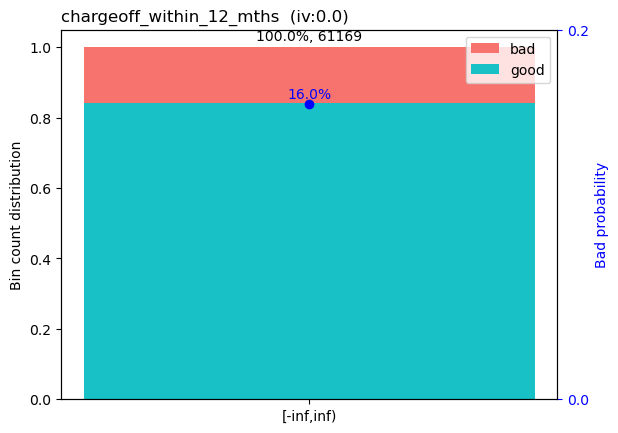

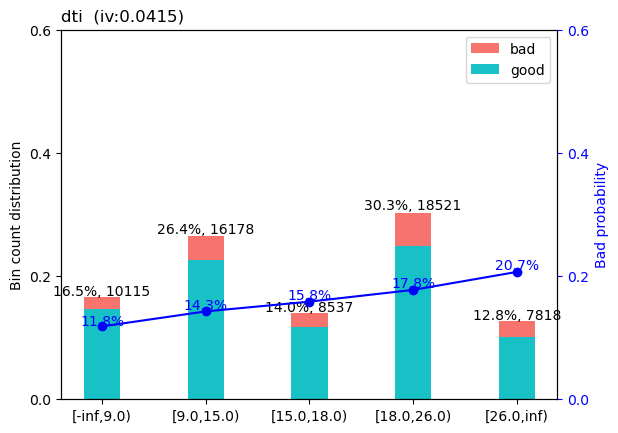

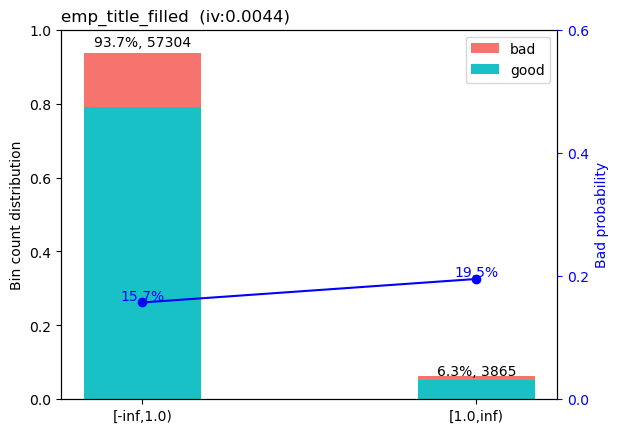

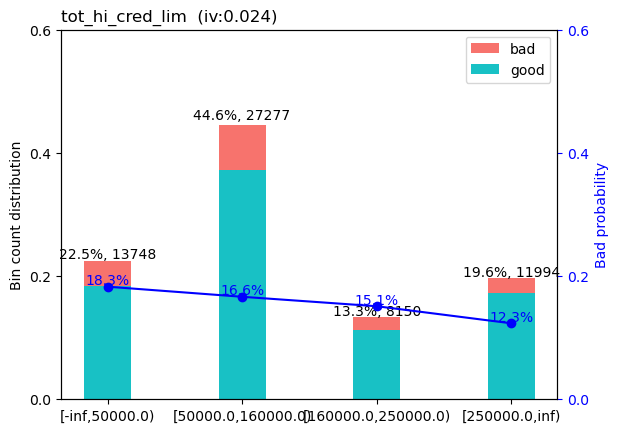

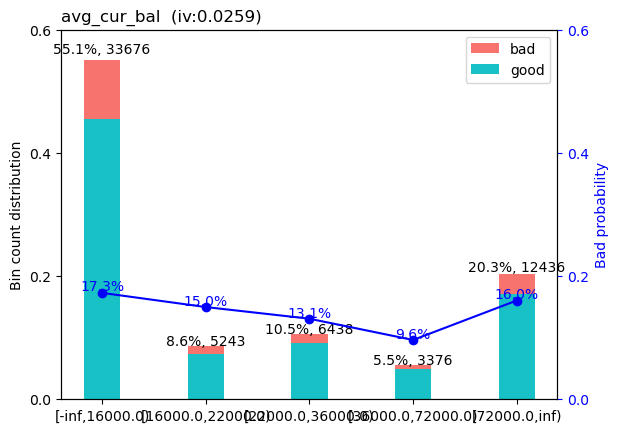

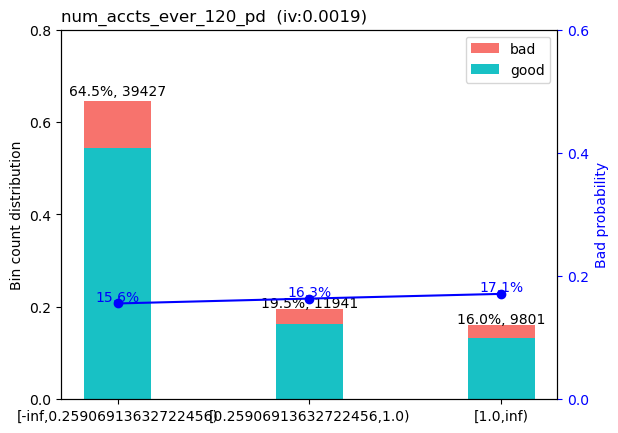

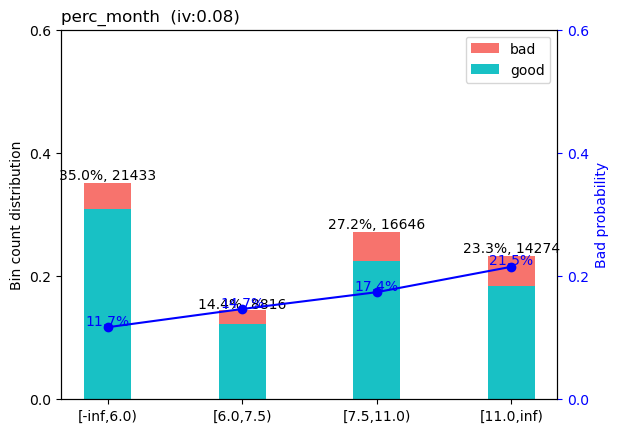

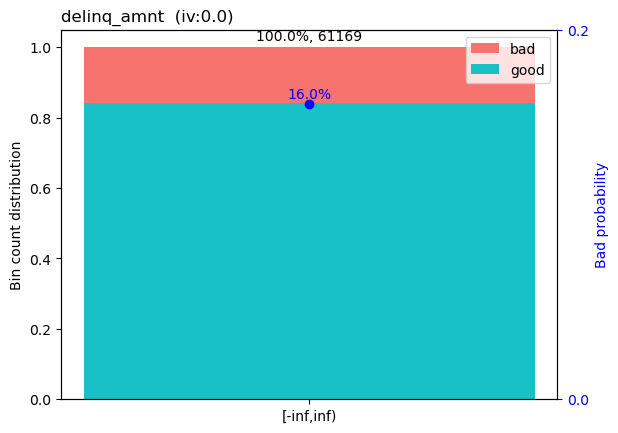

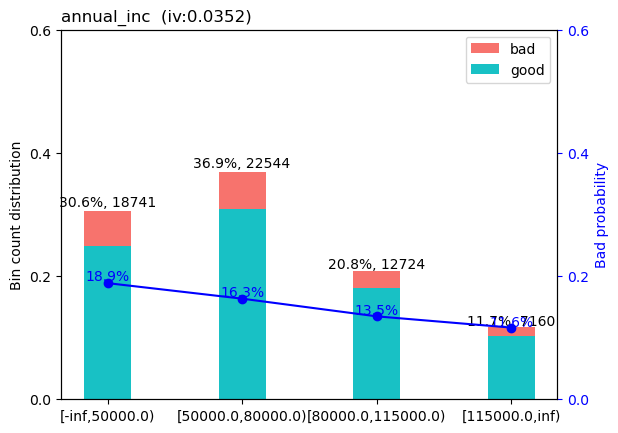

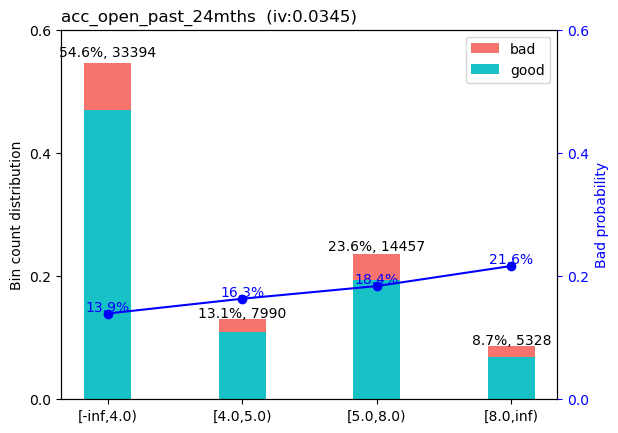

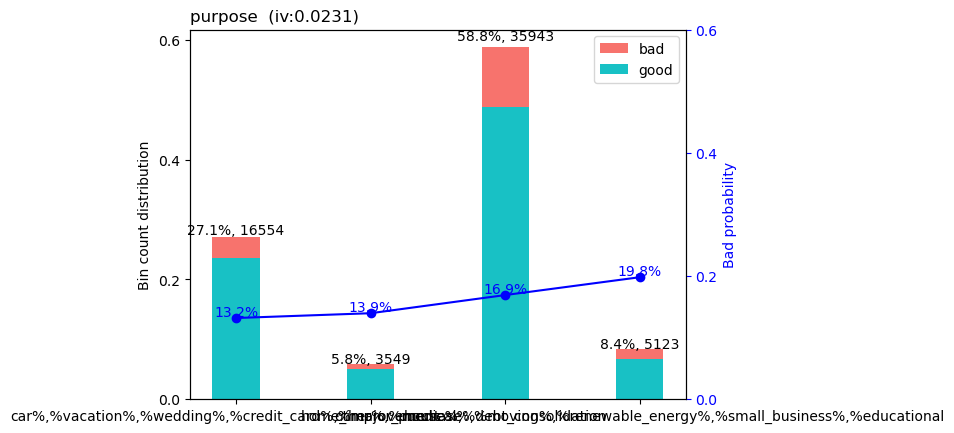

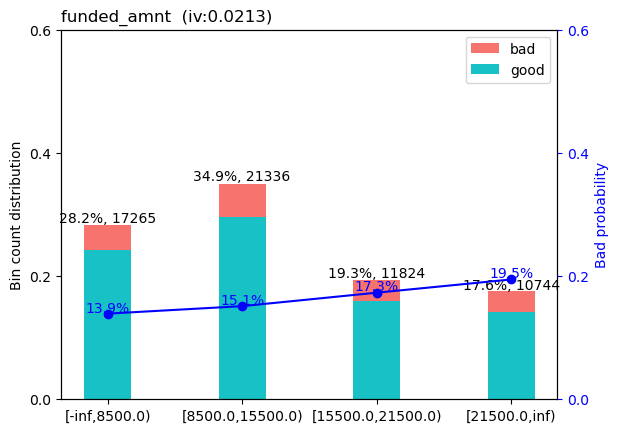

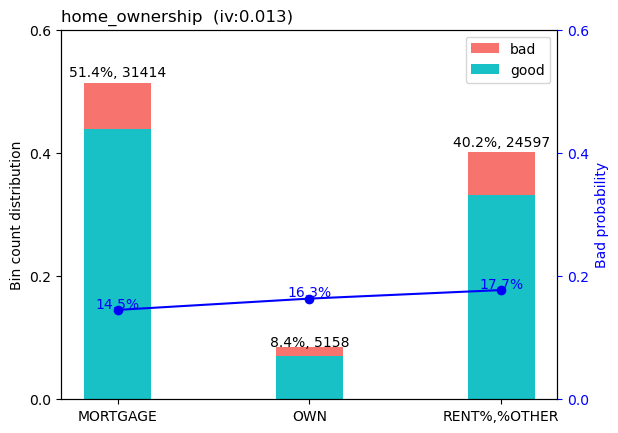

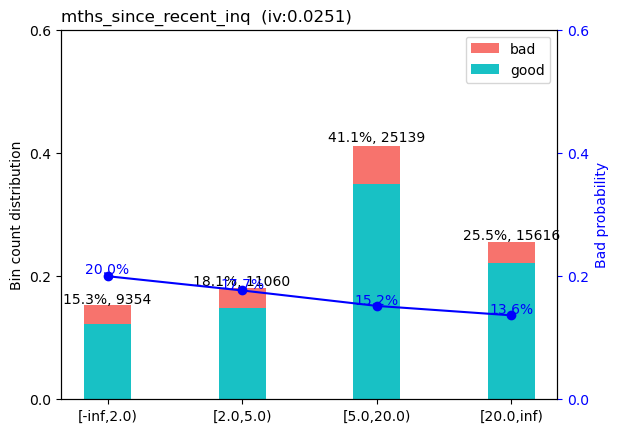

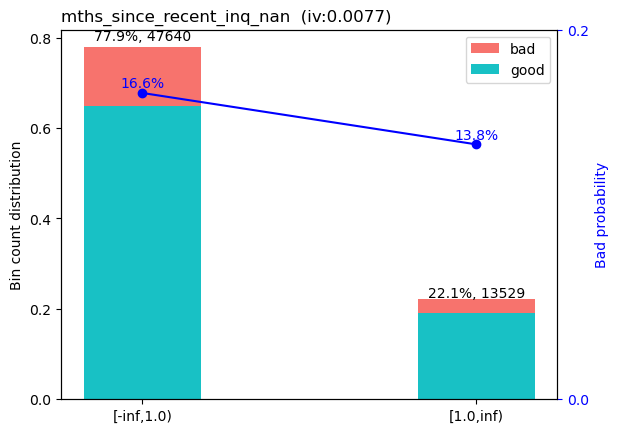

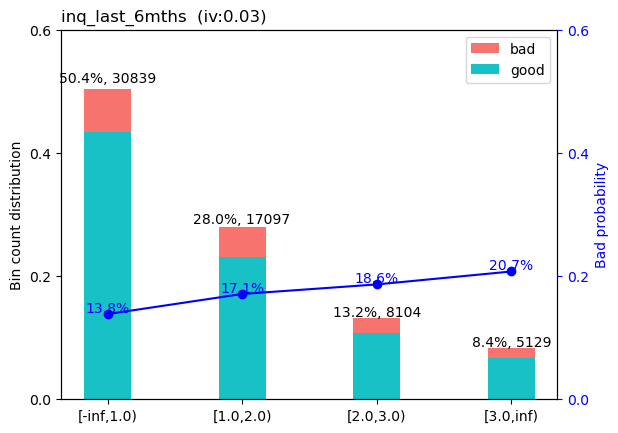

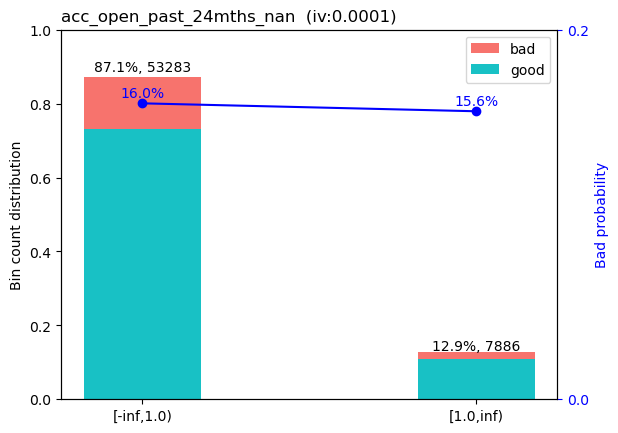

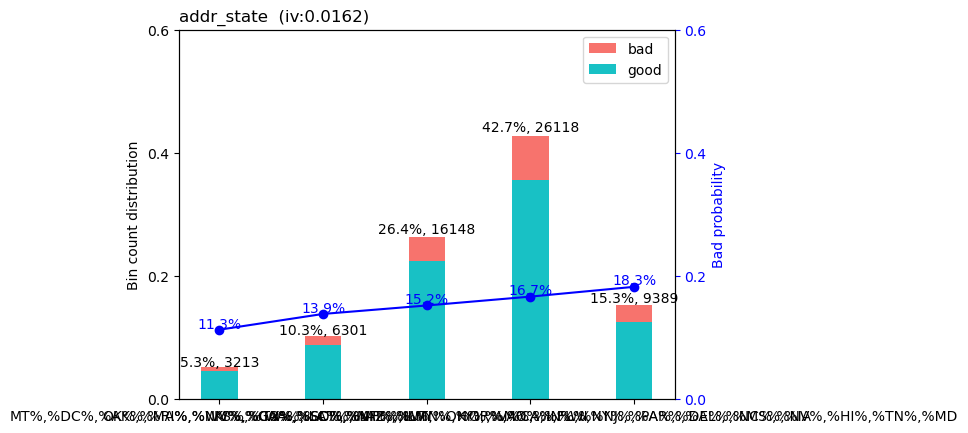

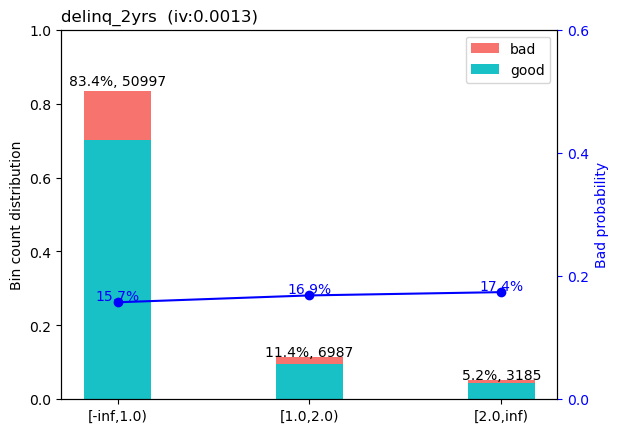

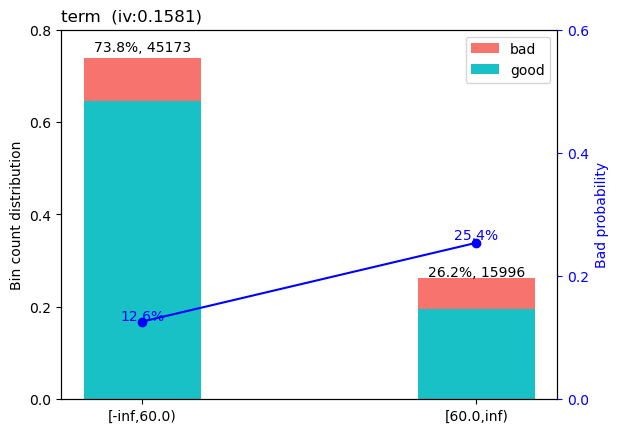

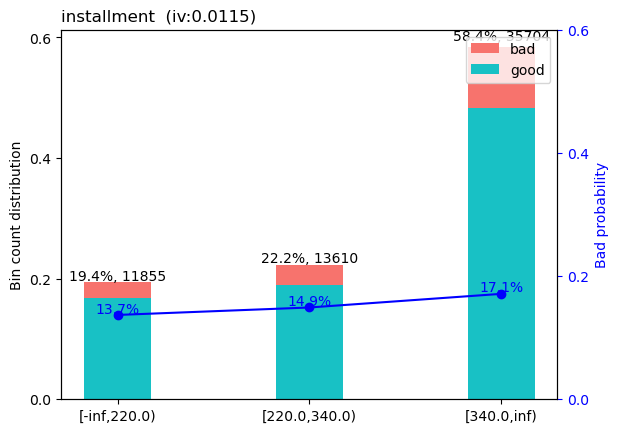

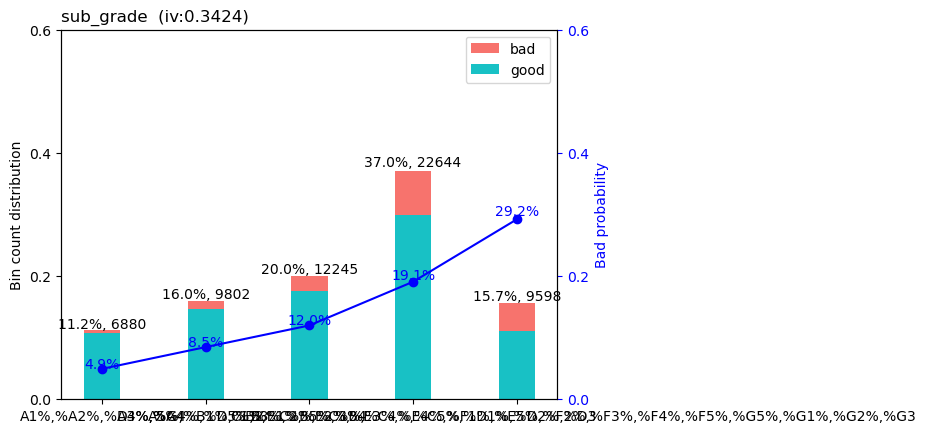

In [51]:
sc.woebin_plot(bins)

Как видно некоторые переменные плохо разделились по бинам или немонотонны, поэтому отдельно разделим их вручную для монотонности

In [52]:
breaks_list = {
    'chargeoff_within_12_mths': [0,0.5],
    'delinq_amnt': [0, 100,500, float('inf')],
    'mths_since_recent_inq' : [5, 15, 20, float('inf') ],
    'delinq_2yrs':[0,0.5,1.5, float('inf')]
}


bins_adj = sc.woebin(df_train_woe,
                     breaks_list=breaks_list,
    y="def") 

[INFO] creating woe binning ...


/Users/amirzoyeva/opt/anaconda3/lib/python3.9/site-packages/scorecardpy/woebin.py:1225: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



{'chargeoff_within_12_mths': <Figure size 640x480 with 2 Axes>,
 'dti': <Figure size 640x480 with 2 Axes>,
 'emp_title_filled': <Figure size 640x480 with 2 Axes>,
 'tot_hi_cred_lim': <Figure size 640x480 with 2 Axes>,
 'avg_cur_bal': <Figure size 640x480 with 2 Axes>,
 'num_accts_ever_120_pd': <Figure size 640x480 with 2 Axes>,
 'perc_month': <Figure size 640x480 with 2 Axes>,
 'delinq_amnt': <Figure size 640x480 with 2 Axes>,
 'annual_inc': <Figure size 640x480 with 2 Axes>,
 'acc_open_past_24mths': <Figure size 640x480 with 2 Axes>,
 'purpose': <Figure size 640x480 with 2 Axes>,
 'funded_amnt': <Figure size 640x480 with 2 Axes>,
 'home_ownership': <Figure size 640x480 with 2 Axes>,
 'mths_since_recent_inq': <Figure size 640x480 with 2 Axes>,
 'mths_since_recent_inq_nan': <Figure size 640x480 with 2 Axes>,
 'inq_last_6mths': <Figure size 640x480 with 2 Axes>,
 'acc_open_past_24mths_nan': <Figure size 640x480 with 2 Axes>,
 'addr_state': <Figure size 640x480 with 2 Axes>,
 'delinq_2yrs

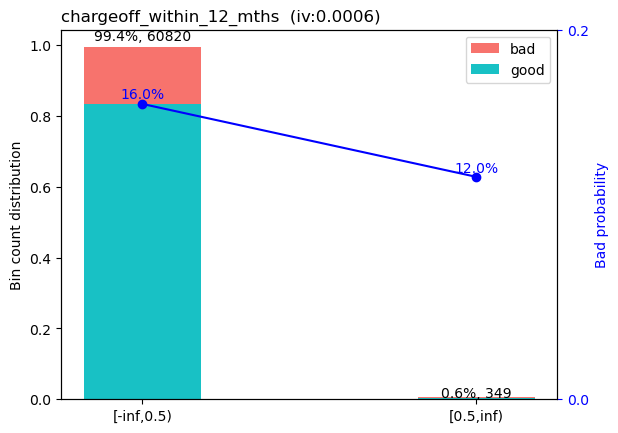

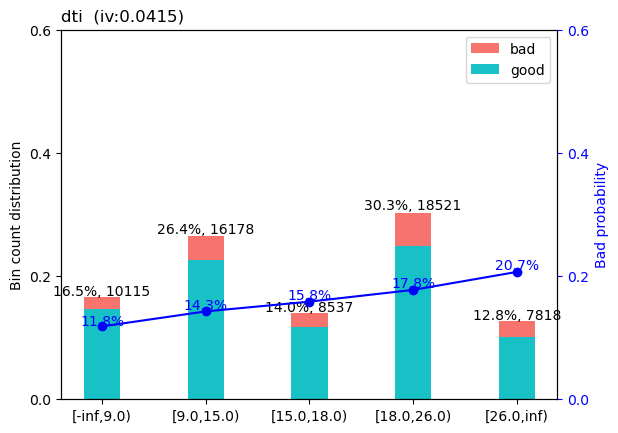

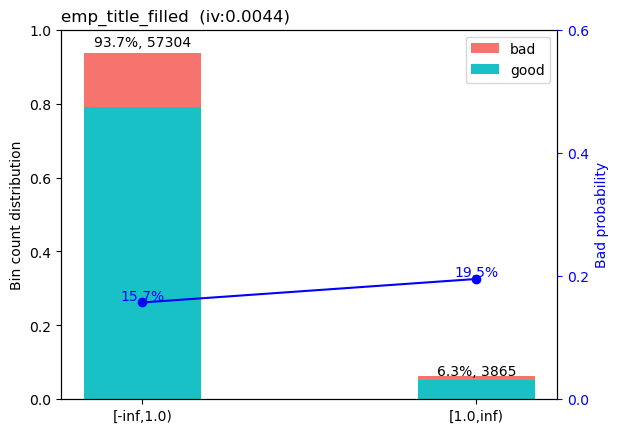

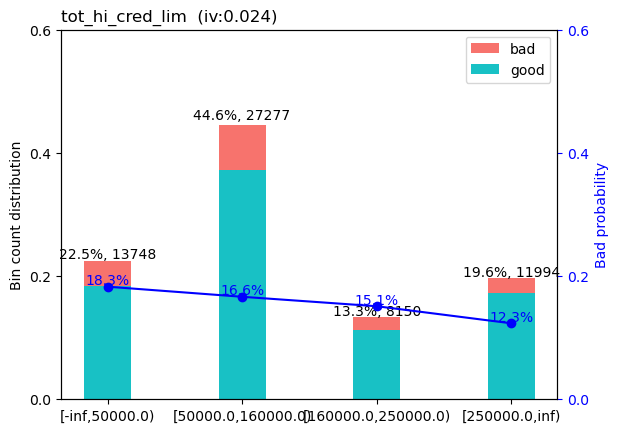

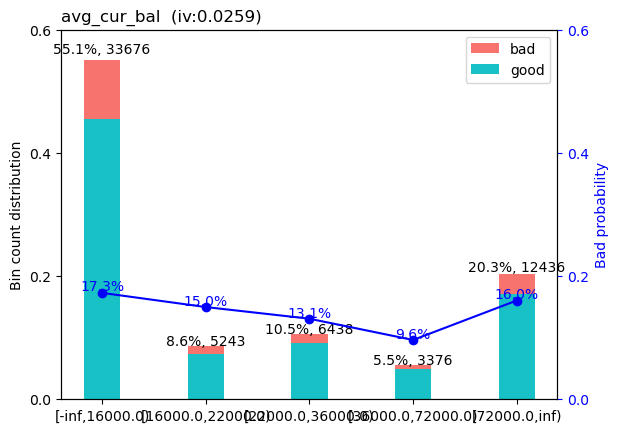

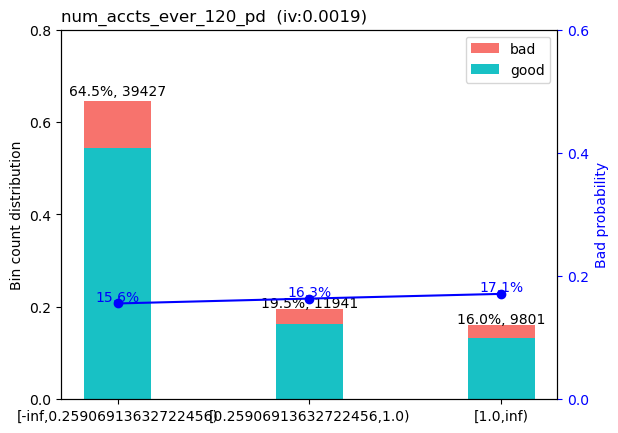

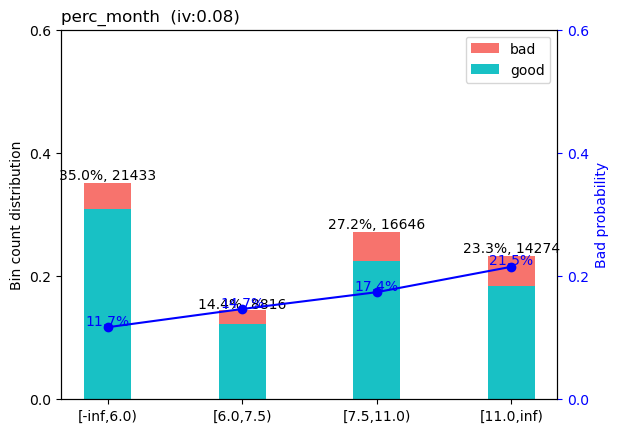

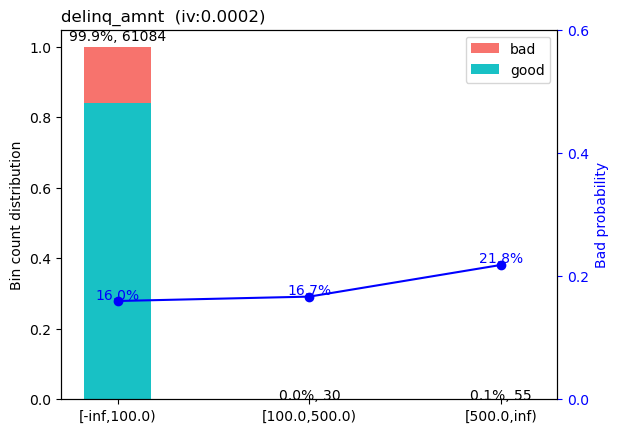

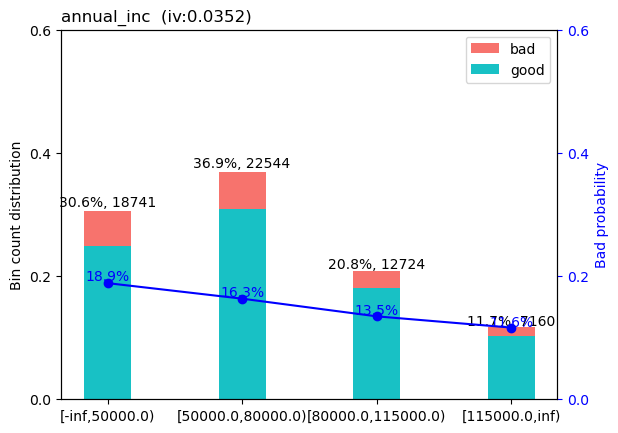

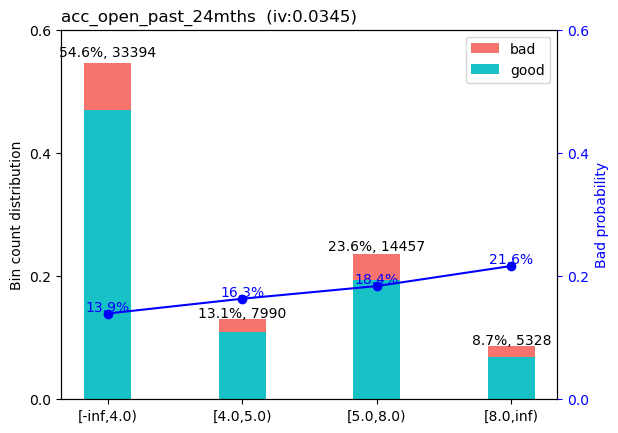

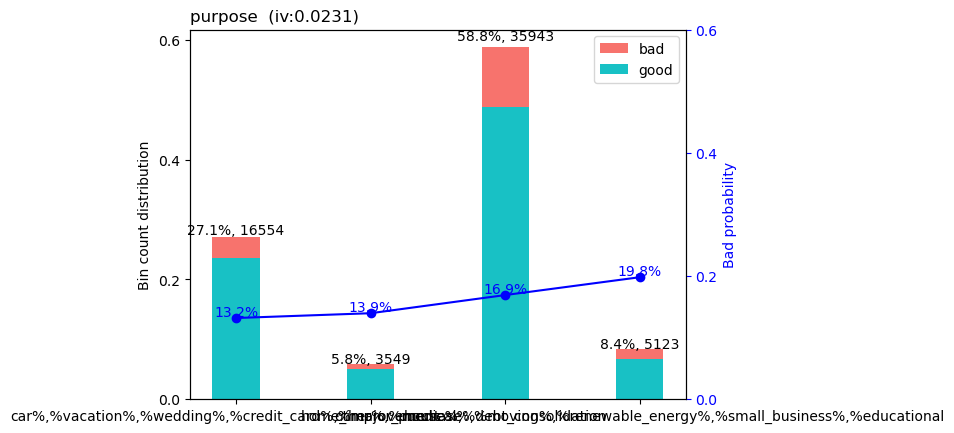

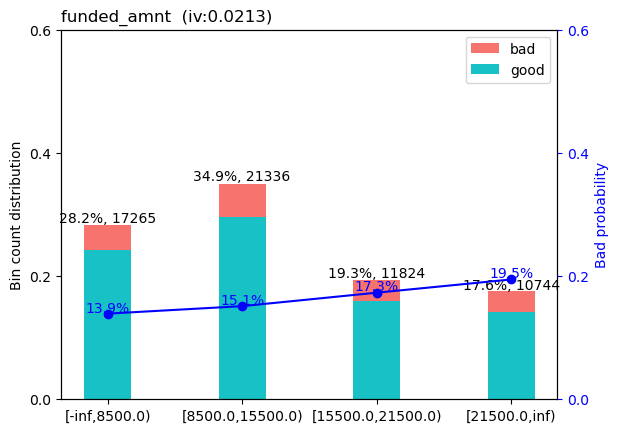

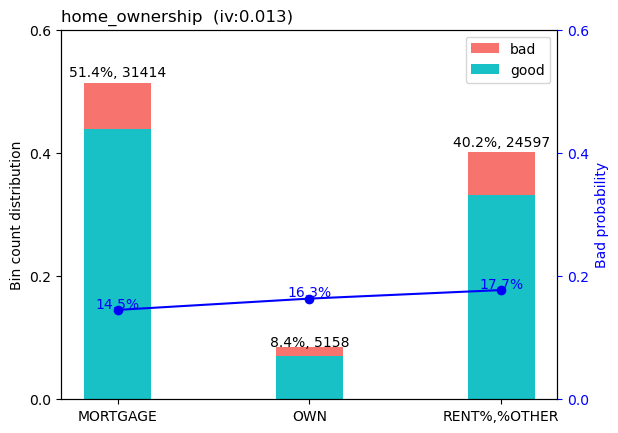

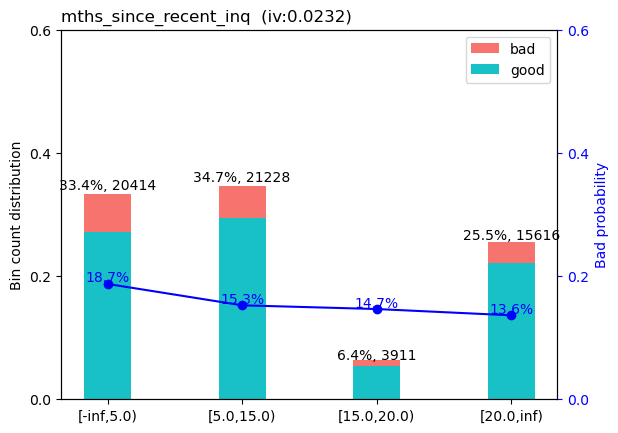

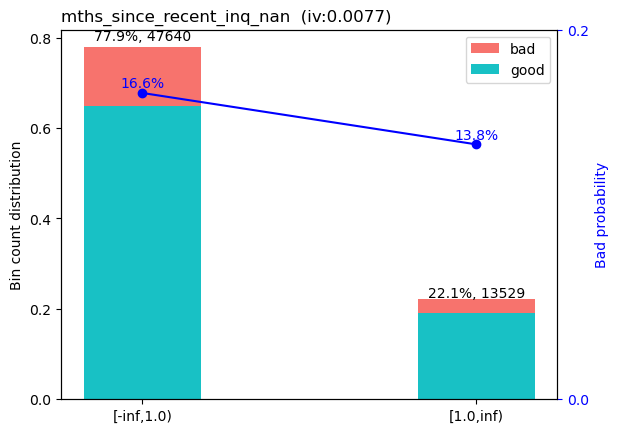

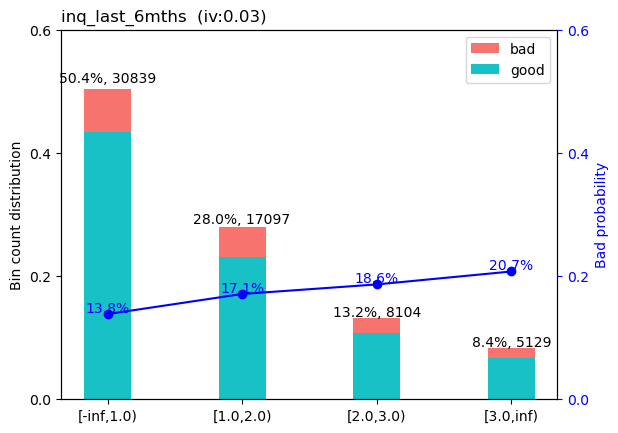

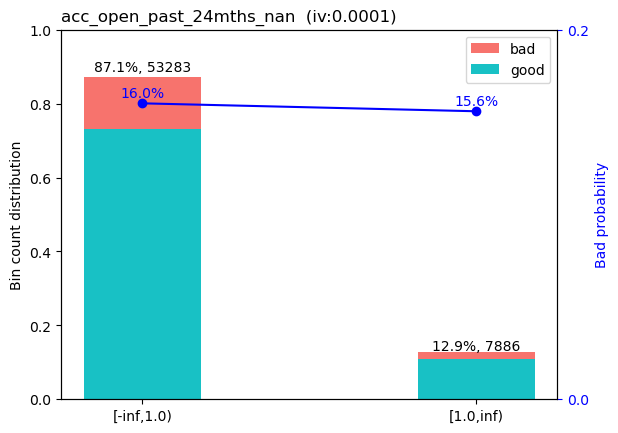

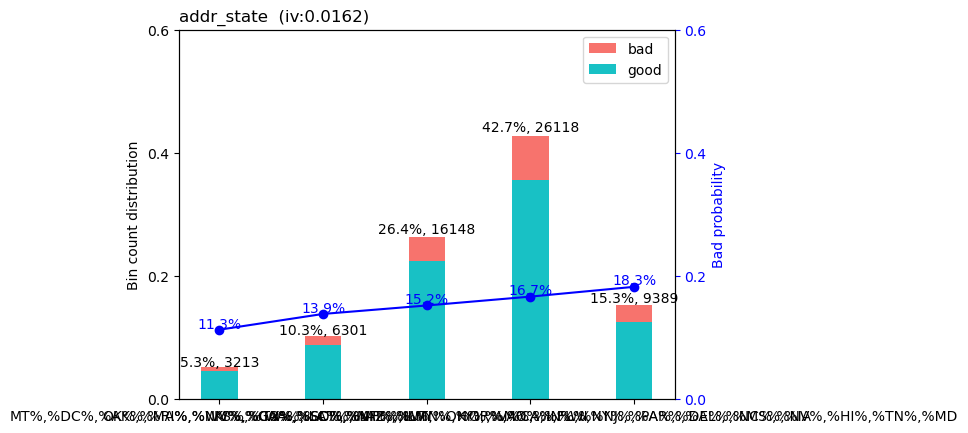

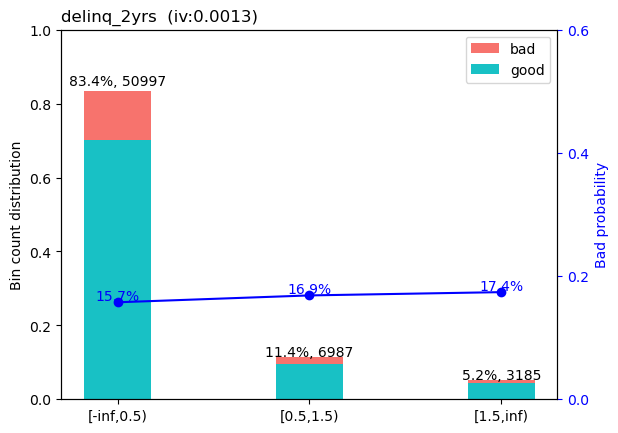

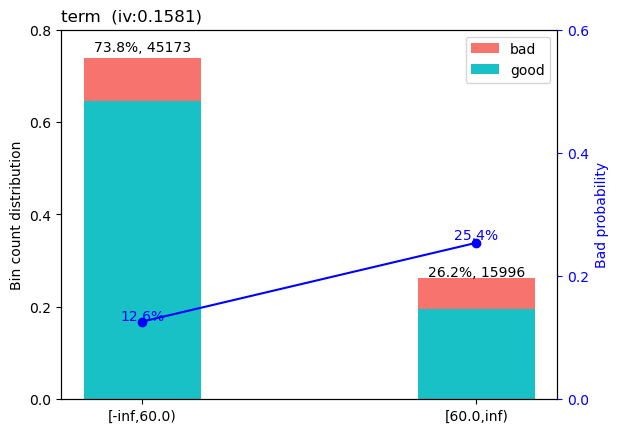

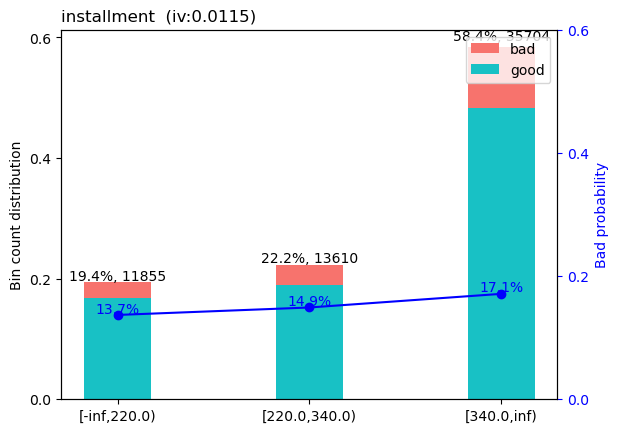

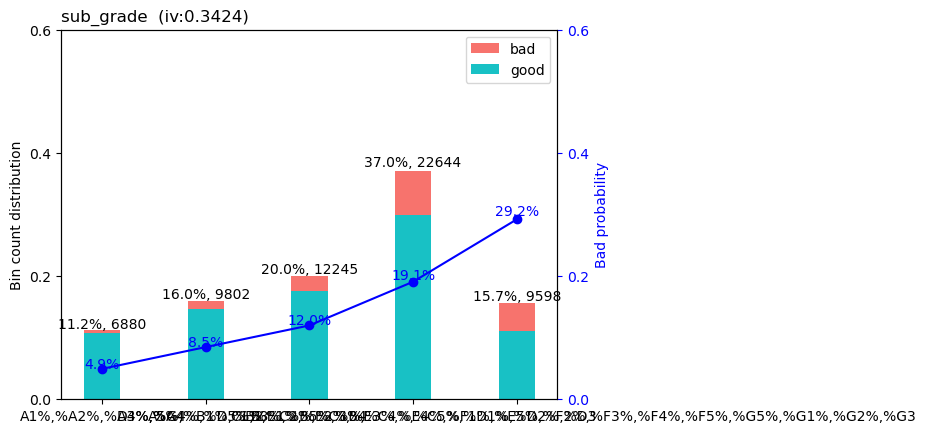

In [53]:
sc.woebin_plot(bins_adj)

In [54]:
total_ivs= {}
for variable_bins in bins:
    total_ivs[variable_bins] = bins[variable_bins]['total_iv'][0]
print(total_ivs)

{'chargeoff_within_12_mths': 0.0, 'dti': 0.04145522105338506, 'emp_title_filled': 0.004441648670828217, 'tot_hi_cred_lim': 0.02396965419050877, 'avg_cur_bal': 0.025905517392935232, 'num_accts_ever_120_pd': 0.001899976116958305, 'perc_month': 0.07998095171489114, 'delinq_amnt': 0.0, 'annual_inc': 0.035196389709258355, 'acc_open_past_24mths': 0.03453064773827254, 'purpose': 0.02311048873329757, 'funded_amnt': 0.02130358404011557, 'home_ownership': 0.013020201872118253, 'mths_since_recent_inq': 0.025085976764350336, 'mths_since_recent_inq_nan': 0.0077355346068177675, 'inq_last_6mths': 0.02998871914254074, 'acc_open_past_24mths_nan': 0.00011633226384299706, 'addr_state': 0.016203746820826585, 'delinq_2yrs': 0.0012910281703626262, 'term': 0.15813470723119746, 'installment': 0.011543706998191962, 'sub_grade': 0.34237340827945}


Отфильтруем наши переменные  по признаку IV, для которого установим порог в 0.01

In [55]:
threshold = 0.01
filtered_dict = {key: value for key, value in total_ivs.items() if value >= threshold}


In [56]:
print('Количество оставшихся признаков:',len(filtered_dict))

Количество оставшихся признаков: 15


In [57]:
target_train_woe  = df_train_woe['def']

df_train_woe = df_train_woe.drop(['def'], axis=1)
df_train_woe = df_train_woe.filter(items=filtered_dict.keys())
df_train_woe


dti  tot_hi_cred_lim   avg_cur_bal  perc_month  annual_inc  \
0      16.39     72717.547061  72717.547061    9.582222     21600.0   
1      16.31    153379.000000  23735.000000    8.525558     95000.0   
2      14.01     50834.000000   4070.000000   10.789867     90000.0   
3      14.51     32683.000000   1127.000000    9.559814     43000.0   
4      22.65     59495.000000   3443.000000    9.166065     62000.0   
...      ...              ...           ...         ...         ...   
61164   7.96     48557.000000   5278.000000    5.251558    133325.0   
61165  20.97    333493.000000  18594.000000    5.000780     82000.0   
61166  33.65     36095.000000   2093.000000   10.891556     27000.0   
61167  18.48     72717.547061  72717.547061    2.228897     58000.0   
61168  22.33     17432.000000   1302.000000    3.291429     28000.0   

       acc_open_past_24mths             purpose  funded_amnt home_ownership  \
0                       0.0  debt_consolidation         5000           RENT   
1                       4.0  debt_consolidation        20000       MORTGAGE   
2                       5.0  debt_consolidation        24000           RENT   
3                       3.0  debt_consolidation        10000       MORTGAGE   
4                       5.0         credit_card        13000       MORTGAGE   
...                     ...                 ...          ...            ...   
61164                   1.0  debt_consolidation        18375           RENT   
61165                   3.0  debt_consolidation        16500       MORTGAGE   
61166                   5.0  debt_consolidation         6800           RENT   
61167                   0.0  debt_consolidation         3250       MORTGAGE   
61168                   5.0               other         2000           RENT   

       mths_since_recent_inq  inq_last_6mths addr_state  term  installment  \
0                       24.0               3         IL    36       172.48   
1                        4.0               1         FL    36       674.94   
2                       19.0               0         NJ    36       809.24   
3                        5.0               1         MI    36       342.56   
4                        5.0               3         TX    36       473.58   
...                      ...             ...        ...   ...          ...   
61164                   24.0               0         CA    36       583.47   
61165                    1.0               2         TX    60       341.72   
61166                    5.0               1         FL    36       245.06   
61167                   24.0               0         TX    36       107.73   
61168                    6.0               1         IL    36        76.80   

      sub_grade  
0            C3  
1            B4  
2            B5  
3            C2  
4            D2  
...         ...  
61164        A5  
61165        A5  
61166        D1  
61167        B5  
61168        E3  

[61169 rows x 15 columns]

In [58]:

train_woe = sc.woebin_ply(df_train_woe, bins_adj)

[INFO] converting into woe values ...


In [59]:
train_woe

dti_woe  funded_amnt_woe  home_ownership_woe  \
0     -0.008255        -0.162264            0.126515   
1     -0.008255         0.097029           -0.112328   
2     -0.132070         0.240419            0.126515   
3     -0.132070        -0.063944           -0.112328   
4      0.128092        -0.063944           -0.112328   
...         ...              ...                 ...   
61164 -0.346976         0.097029            0.126515   
61165  0.128092         0.097029           -0.112328   
61166  0.316359        -0.162264            0.126515   
61167  0.128092        -0.162264           -0.112328   
61168  0.128092        -0.162264            0.126515   

       mths_since_recent_inq_woe  inq_last_6mths_woe  addr_state_woe  \
0                      -0.185341            0.320899        0.051839   
1                       0.193452            0.082066        0.162139   
2                      -0.100964           -0.168214        0.162139   
3                      -0.053583            0.082066        0.051839   
4                      -0.053583            0.320899       -0.166113   
...                          ...                 ...             ...   
61164                  -0.185341           -0.168214       -0.055561   
61165                   0.193452            0.188040       -0.166113   
61166                  -0.053583            0.082066        0.162139   
61167                  -0.185341           -0.168214       -0.166113   
61168                  -0.053583            0.082066        0.051839   

       perc_month_woe  tot_hi_cred_lim_woe  avg_cur_bal_woe  term_woe  \
0            0.102732             0.049946         0.005584 -0.274275   
1            0.102732             0.049946        -0.232750 -0.274275   
2            0.102732             0.049946         0.094698 -0.274275   
3            0.102732             0.163720         0.094698 -0.274275   
4            0.102732             0.049946         0.094698 -0.274275   
...               ...                  ...              ...       ...   
61164       -0.360625             0.163720         0.094698 -0.274275   
61165       -0.360625            -0.300160        -0.075495  0.584221   
61166        0.102732             0.163720         0.094698 -0.274275   
61167       -0.360625             0.049946         0.005584 -0.274275   
61168       -0.360625             0.163720         0.094698 -0.274275   

       installment_woe  annual_inc_woe  acc_open_past_24mths_woe  purpose_woe  \
0            -0.179967        0.201952                 -0.160785     0.068275   
1             0.083830       -0.199372                  0.026698     0.068275   
2             0.083830       -0.199372                  0.170375     0.068275   
3             0.083830        0.201952                 -0.160785     0.068275   
4             0.083830        0.027584                  0.170375    -0.224819   
...                ...             ...                       ...          ...   
61164         0.083830       -0.366271                 -0.160785     0.068275   
61165         0.083830       -0.199372                 -0.160785     0.068275   
61166        -0.081125        0.201952                  0.170375     0.068275   
61167        -0.179967        0.027584                 -0.160785     0.068275   
61168        -0.179967        0.201952                  0.170375     0.262000   

       sub_grade_woe  
0           0.216321  
1          -0.332236  
2          -0.332236  
3           0.216321  
4           0.216321  
...              ...  
61164      -0.717846  
61165      -0.717846  
61166       0.216321  
61167      -0.332236  
61168       0.775780  

[61169 rows x 15 columns]

## Подбор гиперпараметров с помощью кросс- валидации ##

In [60]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5)

In [61]:
from sklearn.model_selection import GridSearchCV

params = {
    'C': np.logspace(-3, 0, 20),
    'penalty': ['l1', 'l2', 'elasticnet'],
}

model = LogisticRegression()

GS_LR = GridSearchCV(cv=cv, estimator=model, param_grid=params, scoring='roc_auc')

GS_LR.fit(train_woe,target_train_woe)

/Users/amirzoyeva/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


200 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/amirzoyeva/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/amirzoyeva/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/amirzoyeva/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_mo

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': array([0.001     , 0.00143845, 0.00206914, 0.00297635, 0.00428133,
       0.00615848, 0.00885867, 0.01274275, 0.01832981, 0.02636651,
       0.0379269 , 0.05455595, 0.078476  , 0.11288379, 0.16237767,
       0.23357215, 0.33598183, 0.48329302, 0.6951928 , 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='roc_auc')

In [62]:
print(GS_LR.best_params_) 
print('Best ROC-AUC {:.3f}'.format(GS_LR.best_score_))

{'C': 1.0, 'penalty': 'l2'}
Best ROC-AUC 0.691


Заметим, что мы получили стандартные гиперпараметры логистической регресси из библиотеки sk-learn. Попробуем поискать гиперпараметры с помощью рандомизированного поиска 

In [63]:
from sklearn.model_selection import RandomizedSearchCV
params = {
    'C': np.logspace(-3, 0, 20),
    'penalty': ['l1', 'l2', 'elasticnet'],
}

model = LogisticRegression()

RS_LR = RandomizedSearchCV(estimator=model, param_distributions=params, cv=cv, scoring='roc_auc')


RS_LR.fit(train_woe,target_train_woe)

/Users/amirzoyeva/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/amirzoyeva/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/amirzoyeva/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/amirzoyeva/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=LogisticRegression(),
                   param_distributions={'C': array([0.001     , 0.00143845, 0.00206914, 0.00297635, 0.00428133,
       0.00615848, 0.00885867, 0.01274275, 0.01832981, 0.02636651,
       0.0379269 , 0.05455595, 0.078476  , 0.11288379, 0.16237767,
       0.23357215, 0.33598183, 0.48329302, 0.6951928 , 1.        ]),
                                        'penalty': ['l1', 'l2', 'elasticnet']},
                   scoring='roc_auc')

In [64]:
print(RS_LR.best_params_) 
print('Best ROC-AUC {:.3f}'.format(RS_LR.best_score_))

{'penalty': 'l2', 'C': 0.1623776739188721}
Best ROC-AUC 0.691


Получили немного другой параметр C, но метрика ROC_AUC осталась неизменной.
Ради интереса обучу обе модели, чтобы сравнить другие метрики, например, accuracу и recall

In [65]:
X_train_woe, X_val_woe, y_train_woe, y_val_woe = train_test_split(df_train_woe, target_train_woe, test_size=0.2, random_state=42)

In [66]:
test_woe = sc.woebin_ply(X_val_woe, bins_adj)
train_woe = sc.woebin_ply(X_train_woe, bins_adj)

[INFO] converting into woe values ...
[INFO] converting into woe values ...


In [67]:
model_woe =  LogisticRegression(C=1, penalty='l2')
model_woe.fit(train_woe, y_train_woe)
test_pred = model_woe.predict_proba(test_woe)[:,1]
woe_pred= model_woe.predict(test_woe)
print('accuracy_score for Grid search= {:.3f}'.format(accuracy_score(y_val_woe, woe_pred)))
print('recall_score for Grid search = {:.3f}'.format(recall_score(y_val_woe, woe_pred)))
print('precision_score  for Grid search= {:.3f}'.format(precision_score(y_val_woe,woe_pred)))

accuracy_score for Grid search= 0.841
recall_score for Grid search = 0.005
precision_score  for Grid search= 0.714


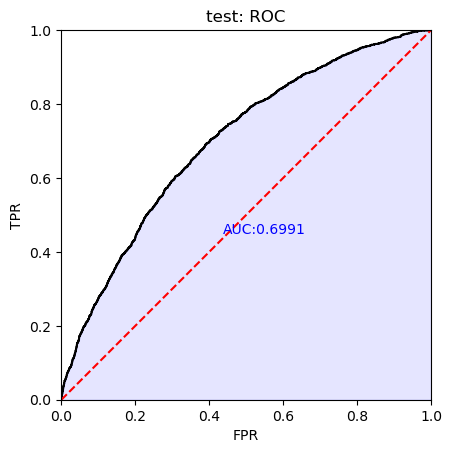

Gini coeff test  = 0.3982


In [68]:
test_perf_woe = sc.perf_eva(y_val_woe, test_pred, plot_type = ["roc"], title = "test")
print('Gini coeff test  =' , test_perf_woe['Gini'])

In [69]:
model2 =  LogisticRegression(C=RS_LR.best_params_['C'], penalty='l2')
model2.fit(train_woe, y_train_woe)
test_pred = model2.predict_proba(test_woe)[:,1]
woe_pred= model2.predict(test_woe)
print('accuracy_score for Random Search= {:.3f}'.format(accuracy_score(y_val_woe, woe_pred)))
print('recall_score for Random Search = {:.3f}'.format(recall_score(y_val_woe, woe_pred)))
print('precision_score for Random Search = {:.3f}'.format(precision_score(y_val_woe,woe_pred)))


accuracy_score for Random Search= 0.841
recall_score for Random Search = 0.005
precision_score for Random Search = 0.750


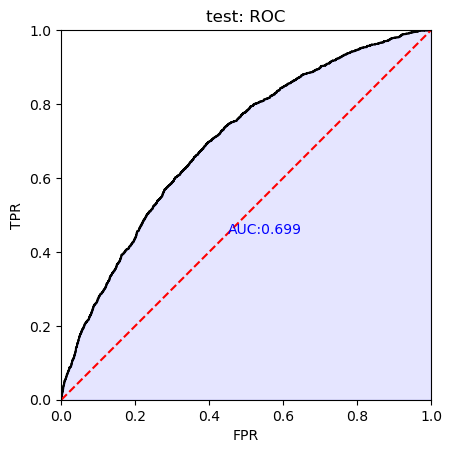

Gini coeff test  = 0.3981


In [70]:
test_perf_woe = sc.perf_eva(y_val_woe, test_pred, plot_type = ["roc"], title = "test")
gini_coef_test = test_perf_woe['Gini']
print('Gini coeff test  =' , test_perf_woe['Gini'])

Сделаем выводы по поводу значений метрик для нашей модели:
на тестовом дата сете, при равном показателе ROC-AUC, модель с параметрами, подобранными с помощью Grid Search имеет лучший показатель precision, поэтому оставим модель с параметрами C = 1, penalty = l2

Разберемся со значениями метрик:

**Accuracy:** $(TP + TN)/(TP + TN + FP + FN)$ -- доля исходов, которую наша модель определила правильно

**Precision:** $TP/ (TP + FP)$ -- какая доля от предсказанных объектов класса 1 и в реальности является объектом класса 1.

**Recall:** $TP / (TP + FN)$ -- какая доля от тех значений, которые в  реальности должны относится к классу 1, были правильно определены моделью

**Precision**:

Precision - доля правильно предсказанных положительных классов (дефолтных клиентов) относительно всех предсказанных положительных классов.

В контексте нашей задачи, precision показывает, какая доля клиентов, которым был присвоен класс "дефолт", действительно понесли дефолт.

Высокое значение precision означает, что модель редко классифицирует недефолтных клиентов как дефолтных.

**Recall**:

Recall - доля правильно предсказанных положительных классов (дефолтных клиентов) относительно всех "1" в данных (все клиенты с потенциальным дефолтом).

В контексте нашей задачи, recall показывает, какая доля всех дефолтных клиентов была правильно классифицирована моделью.

Высокое значение recall означает, что модель редко пропускает дефолтных клиентов.

Таким образом, на тестовом дата сете, при прочих равных показателях, модель с параметрами, подобранными с помощью Grid Search реже ошибается в определении дефолтного и недефолтного клиентов, поэтому оставим модель с параметром C = 1, penalty

## Валидационный датасет ##

In [71]:
df_val = pd.read_csv('/Users/amirzoyeva/Desktop/scoring/vl_for_students.csv')


In [72]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60333 entries, 0 to 60332
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   issue_d                   60333 non-null  object 
 1   purpose                   60333 non-null  object 
 2   addr_state                60333 non-null  object 
 3   sub_grade                 60333 non-null  object 
 4   home_ownership            60333 non-null  object 
 5   emp_title                 57187 non-null  object 
 6   installment               60333 non-null  float64
 7   dti                       60333 non-null  float64
 8   funded_amnt               60333 non-null  int64  
 9   annual_inc                60333 non-null  float64
 10  emp_length                57198 non-null  float64
 11  term                      60333 non-null  int64  
 12  inq_last_6mths            60333 non-null  int64  
 13  mths_since_recent_inq     54344 non-null  float64
 14  delinq

In [73]:
df_val.drop(columns=['num_tl_90g_dpd_24m'], inplace = True)
df_val['home_ownership'] = df_val['home_ownership'].replace(['OTHER', 'NONE'], 'OTHER')
df_val.drop(columns = ['emp_length'], inplace =True )
df_val['emp_title_filled'] = np.where(df_val['emp_title'].isna(), 1, 0)
df_val.drop(columns = ['emp_title'], inplace=True)
df_val['mths_since_recent_inq_nan'] = np.where(df_val['mths_since_recent_inq'].isna(), 1, 0)
df_val['mths_since_recent_inq'].fillna(df_val['mths_since_recent_inq'].max(), inplace = True)
df_val['perc_month'] = (df_val['installment']/(df_val['annual_inc']/12))*100
df_val_woe = df_val


In [74]:
df_val

issue_d             purpose addr_state sub_grade home_ownership  \
0      2015-04-01  debt_consolidation         CT        C5       MORTGAGE   
1      2014-09-01  debt_consolidation         WI        D1       MORTGAGE   
2      2014-10-01  debt_consolidation         AZ        D3            OWN   
3      2014-07-01  debt_consolidation         FL        C2       MORTGAGE   
4      2015-01-01         credit_card         CA        B5            OWN   
...           ...                 ...        ...       ...            ...   
60328  2014-10-01              moving         WV        E2            OWN   
60329  2014-07-01         credit_card         VA        B5           RENT   
60330  2014-09-01  debt_consolidation         WI        C3            OWN   
60331  2015-04-01  debt_consolidation         CA        B3       MORTGAGE   
60332  2015-01-01  debt_consolidation         AL        B5       MORTGAGE   

       installment    dti  funded_amnt  annual_inc  term  ...  \
0           689.89  17.22        20000    270000.0    36  ...   
1           578.68  25.10        24000     84000.0    60  ...   
2           534.72  17.97        15000     59028.0    36  ...   
3           203.18  15.82         6000     46280.0    36  ...   
4          1162.34  14.37        35000    150000.0    36  ...   
...            ...    ...          ...         ...   ...  ...   
60328        92.30  14.60         2500     94500.0    36  ...   
60329      1070.37  13.60        32000    110000.0    36  ...   
60330       273.35  18.32         8000     52000.0    36  ...   
60331       318.64  17.74        15000     52000.0    60  ...   
60332      1162.34  18.18        35000    131200.0    36  ...   

       chargeoff_within_12_mths  num_accts_ever_120_pd  acc_open_past_24mths  \
0                             0                      0                     8   
1                             0                      0                     2   
2                             0                      3                     8   
3                             0                      2                     3   
4                             1                      2                     2   
...                         ...                    ...                   ...   
60328                         0                      0                    11   
60329                         0                      0                     2   
60330                         0                      0                     6   
60331                         0                      0                     4   
60332                         0                      0                     9   

       avg_cur_bal  tot_hi_cred_lim  delinq_amnt  def  emp_title_filled  \
0            47255         820469.0            0    0                 0   
1            17604         271531.0            0    1                 0   
2             3697          56655.0            0    0                 0   
3             5875          41036.0            0    0                 0   
4            55056         576535.0            0    0                 0   
...            ...              ...          ...  ...               ...   
60328        18053         391249.0            0    0                 0   
60329         4840          64200.0            0    0                 0   
60330        23024         223121.0            0    0                 0   
60331        22523         304634.0            0    0                 0   
60332         6546         239358.0            0    1                 0   

       mths_since_recent_inq_nan  perc_month  
0                              0    3.066178  
1                              1    8.266857  
2                              0   10.870502  
3                              0    5.268280  
4                              1    9.298720  
...                          ...         ...  
60328                          0    1.172063  
60329                          0   11.676764  
60330              

In [75]:
filtered_dict['issue_d'] = 0

[INFO] converting into woe values ...


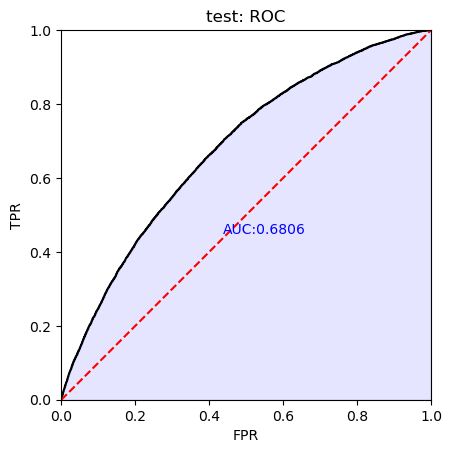

Gini coeff test  = 0.3613


In [76]:
target_val_woe  = df_val_woe['def']

df_val_woe = df_val_woe.drop(['def'], axis=1)
df_val_woe = df_val_woe.filter(items=filtered_dict.keys())

X_valv_woe = df_val_woe

testv_woe = sc.woebin_ply(X_valv_woe, bins_adj)

testv_woe.drop(columns= ['issue_d'], inplace = True)

testv_pred = model_woe.predict_proba(testv_woe)[:,1]
testv_cat = model_woe.predict(testv_woe)

testv_perf_woe = sc.perf_eva(target_val_woe, testv_pred, plot_type = ["roc"], title = "test")


gini_coef_val = testv_perf_woe['Gini']
print('Gini coeff test  =' , testv_perf_woe['Gini'])

Как мы видим, на валидационном датасете коэффициент Джини упал несильно: его показатель все еще больше 35 %, что является хорошим качеством, так что модель в целом работает на реальных данных.

In [77]:
filtered_dict.pop('issue_d')

0

## Валидационные тесты ##

Тест M2.2: Эффективность ранжирования отдельных факторов

In [78]:
filtered_dict

{'dti': 0.04145522105338506,
 'tot_hi_cred_lim': 0.02396965419050877,
 'avg_cur_bal': 0.025905517392935232,
 'perc_month': 0.07998095171489114,
 'annual_inc': 0.035196389709258355,
 'acc_open_past_24mths': 0.03453064773827254,
 'purpose': 0.02311048873329757,
 'funded_amnt': 0.02130358404011557,
 'home_ownership': 0.013020201872118253,
 'mths_since_recent_inq': 0.025085976764350336,
 'inq_last_6mths': 0.02998871914254074,
 'addr_state': 0.016203746820826585,
 'term': 0.15813470723119746,
 'installment': 0.011543706998191962,
 'sub_grade': 0.34237340827945}

In [79]:
results = {}
for i in filtered_dict:
    model =  LogisticRegression(random_state=0, penalty='l2', C = 1)
    model.fit(testv_woe[i+'_woe'].values.reshape(-1,1), target_val_woe.values.reshape(-1, 1))
    testv_pred = model.predict_proba(testv_woe[i+'_woe'].values.reshape(-1,1))[:,1]
    testv_perf_woe = sc.perf_eva(target_val_woe, testv_pred, show_plot=False)
    results[i] = testv_perf_woe['Gini']
   

/Users/amirzoyeva/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/amirzoyeva/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/amirzoyeva/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/amirzoyeva/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel(

In [80]:
results

{'dti': 0.1452,
 'tot_hi_cred_lim': 0.1077,
 'avg_cur_bal': 0.0892,
 'perc_month': 0.1441,
 'annual_inc': 0.1069,
 'acc_open_past_24mths': 0.1506,
 'purpose': 0.0599,
 'funded_amnt': 0.0402,
 'home_ownership': 0.0927,
 'mths_since_recent_inq': 0.0907,
 'inq_last_6mths': 0.0903,
 'addr_state': 0.0263,
 'term': 0.125,
 'installment': 0.0446,
 'sub_grade': 0.3203}

In [81]:
results_plot = sorted(results.items(), key=lambda item: item[1], reverse=True)

feature_names = [item[0] for item in results_plot]
gini_values = [item[1] for item in results_plot]



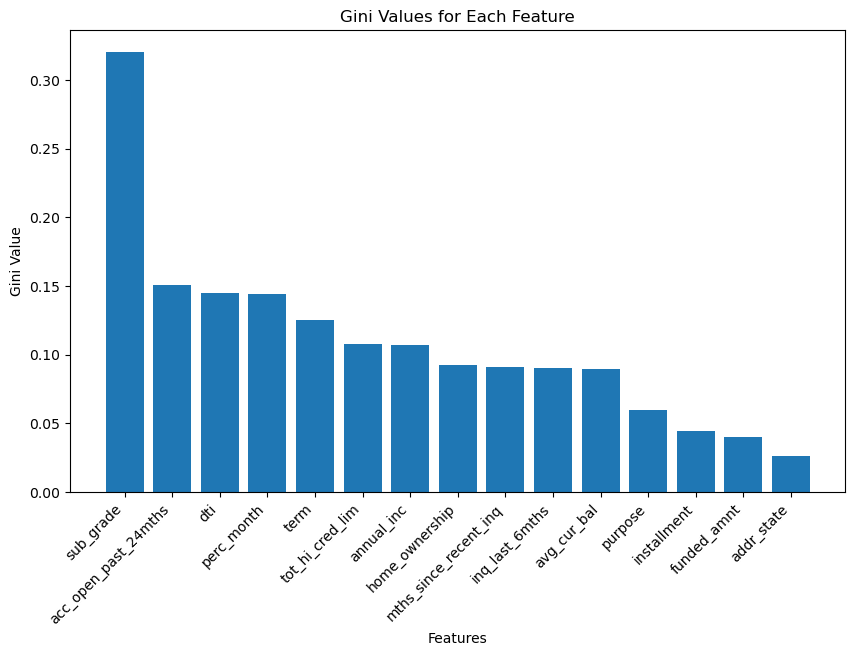

In [82]:

plt.figure(figsize=(10, 6))
plt.bar(feature_names, gini_values)
plt.xlabel('Features')
plt.ylabel('Gini Value')
plt.title('Gini Values for Each Feature')
plt.xticks(rotation=45, ha='right')


plt.show()

Тест M2.5: Анализ вкладов факторов в формирование Джини модели

In [83]:
for i in range(len(feature_names)):
    feature_names[i]=feature_names[i]+'_woe'

In [84]:
feature_names

['sub_grade_woe',
 'acc_open_past_24mths_woe',
 'dti_woe',
 'perc_month_woe',
 'term_woe',
 'tot_hi_cred_lim_woe',
 'annual_inc_woe',
 'home_ownership_woe',
 'mths_since_recent_inq_woe',
 'inq_last_6mths_woe',
 'avg_cur_bal_woe',
 'purpose_woe',
 'installment_woe',
 'funded_amnt_woe',
 'addr_state_woe']

In [85]:
results2 = {}
prev_gini = 0
i = 1
while i < len(feature_names)+1:
    model =  LogisticRegression(random_state=0, penalty='l2', C = 1)
    if i ==1:
        model.fit(testv_woe[feature_names[:i]].values.reshape(-1,1), target_val_woe.values.reshape(-1, 1))
        testv_pred = model.predict_proba(testv_woe[feature_names[:i]].values.reshape(-1,1))[:,1]
        
    else:
        model.fit(testv_woe[feature_names[:i]], target_val_woe.values.reshape(-1, 1))
        testv_pred = model.predict_proba(testv_woe[feature_names[:i]])[:,1]
    testv_perf_woe = sc.perf_eva(target_val_woe.values, testv_pred, show_plot=False)
    results2[feature_names[i-1]] = testv_perf_woe['Gini']-prev_gini
    prev_gini =  testv_perf_woe['Gini']
    i+=1
    

/Users/amirzoyeva/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/amirzoyeva/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/amirzoyeva/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/amirzoyeva/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel(

In [86]:
results2

{'sub_grade_woe': 0.3203,
 'acc_open_past_24mths_woe': 0.0262,
 'dti_woe': 0.008600000000000052,
 'perc_month_woe': 0.005799999999999972,
 'term_woe': 0.00030000000000002247,
 'tot_hi_cred_lim_woe': 0.011299999999999977,
 'annual_inc_woe': 9.999999999998899e-05,
 'home_ownership_woe': 0.0030999999999999917,
 'mths_since_recent_inq_woe': 0.0012000000000000344,
 'inq_last_6mths_woe': 0.00019999999999997797,
 'avg_cur_bal_woe': 0.0,
 'purpose_woe': 0.0,
 'installment_woe': 0.00030000000000002247,
 'funded_amnt_woe': 0.0,
 'addr_state_woe': 0.0005999999999999894}

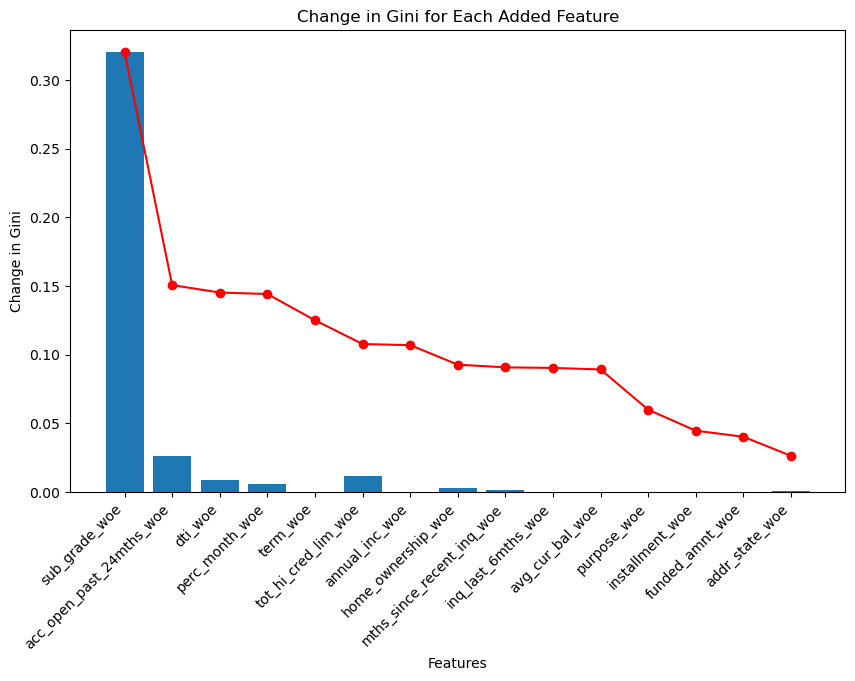

In [87]:

gini_differences = list(results2.values())


plt.figure(figsize=(10, 6))
bars = plt.bar(feature_names, gini_differences)
plt.xlabel('Features')
plt.ylabel('Change in Gini')
plt.title('Change in Gini for Each Added Feature')
plt.xticks(rotation=45, ha='right')


plt.plot(feature_names, gini_values, color='red', marker='o', linestyle='-')

plt.show()

 Тест M5.1: Сравнение эффективности ранжирования модели на разработке и валидации 

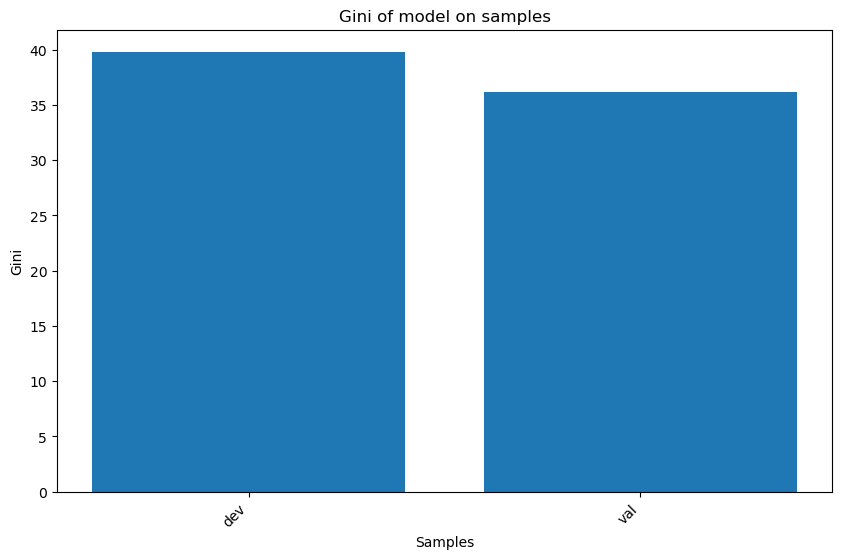

Absolute difference between Gini = -0.0368
Relative difference between Gini = -9.243908565687013


In [88]:

gini_coef_absol = (gini_coef_val - gini_coef_test)
gini_coef_rel = (gini_coef_absol/gini_coef_test)*100

names = ['dev', 'val']
coefs = [gini_coef_test*100, gini_coef_val*100]
plt.figure(figsize=(10, 6))
bars = plt.bar(names, coefs)
plt.xlabel('Samples')
plt.ylabel('Gini')
plt.title('Gini of model on samples')
plt.xticks(rotation=45, ha='right')
plt.show()
print('Absolute difference between Gini =' ,gini_coef_absol)
print('Relative difference between Gini =' ,gini_coef_rel)


Таким образом, абсолютное значение снизилось на около 3 пунктов, а относительное изменение - 9 процентов, что соответсвует зеленому индикатору в тесте

Тест M5.2: Сравнение эффективности ранжирования отдельных факторов модели на разработке и валидации

In [89]:
results_dev = {}
for i in filtered_dict:
    model =  LogisticRegression(random_state=0, penalty='l2', C = 1)
    model.fit(train_woe[i+'_woe'].values.reshape(-1,1), y_train_woe.values.reshape(-1, 1))
    test_pred = model.predict_proba(test_woe[i+'_woe'].values.reshape(-1,1))[:,1]
    test_perf_woe = sc.perf_eva(y_val_woe, test_pred, show_plot=False)
    results_dev[i] = test_perf_woe['Gini']

/Users/amirzoyeva/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/amirzoyeva/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/amirzoyeva/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/amirzoyeva/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel(

In [90]:
results_dev_plot = sorted(results_dev.items(), key=lambda item: item[1], reverse=True)
gini_values_dev = [item[1] for item in results_dev_plot]

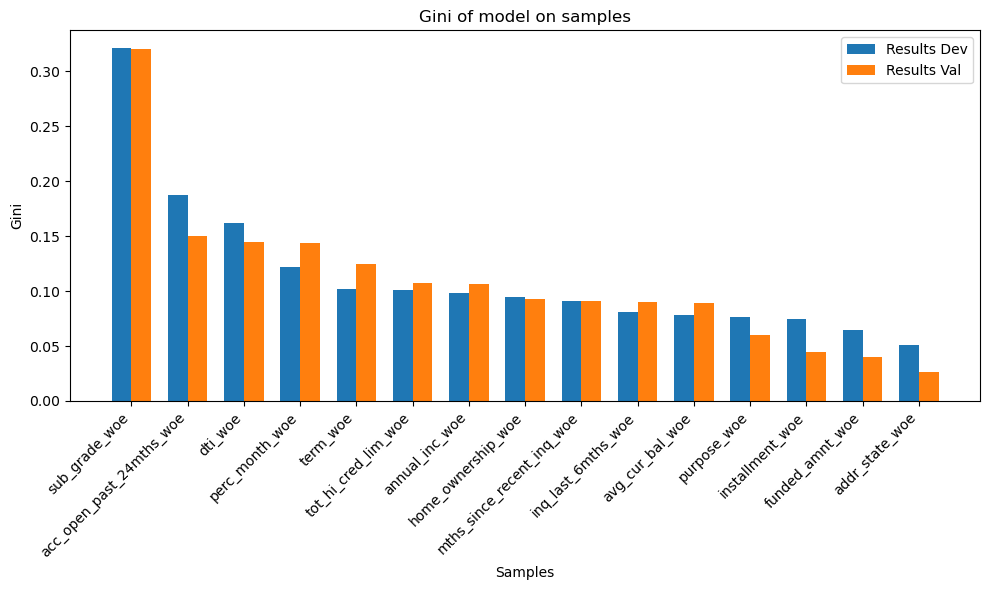

In [91]:

index = range(len(feature_names))
bar_width = 0.35
plt.figure(figsize=(10, 6))
plt.bar(index, gini_values_dev, bar_width, label='Results Dev')

plt.bar([i + bar_width for i in index], gini_values, bar_width, label='Results Val')

plt.xlabel('Samples')
plt.ylabel('Gini')
plt.title('Gini of model on samples')
plt.xticks([i + bar_width/2 for i in index], feature_names, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


In [92]:
results

{'dti': 0.1452,
 'tot_hi_cred_lim': 0.1077,
 'avg_cur_bal': 0.0892,
 'perc_month': 0.1441,
 'annual_inc': 0.1069,
 'acc_open_past_24mths': 0.1506,
 'purpose': 0.0599,
 'funded_amnt': 0.0402,
 'home_ownership': 0.0927,
 'mths_since_recent_inq': 0.0907,
 'inq_last_6mths': 0.0903,
 'addr_state': 0.0263,
 'term': 0.125,
 'installment': 0.0446,
 'sub_grade': 0.3203}

In [93]:
absolute_gini = {}
relative_gini = {}

for i in filtered_dict.keys():


    absolute_gini[i] =  results[i] - results_dev[i]
    relative_gini[i]  = absolute_gini[i]/results_dev[i]


In [94]:
absolute_gini

{'dti': 0.0436,
 'tot_hi_cred_lim': 0.017100000000000004,
 'avg_cur_bal': 0.008599999999999997,
 'perc_month': -0.017799999999999983,
 'annual_inc': -0.014700000000000005,
 'acc_open_past_24mths': 0.052400000000000016,
 'purpose': -0.0351,
 'funded_amnt': -0.038500000000000006,
 'home_ownership': 0.018000000000000002,
 'mths_since_recent_inq': 0.013800000000000007,
 'inq_last_6mths': -0.010899999999999993,
 'addr_state': -0.0382,
 'term': -0.06259999999999999,
 'installment': -0.006399999999999996,
 'sub_grade': -0.0011000000000000454}

In [95]:
relative_gini

{'dti': 0.42913385826771655,
 'tot_hi_cred_lim': 0.18874172185430468,
 'avg_cur_bal': 0.10669975186104214,
 'perc_month': -0.1099444101297096,
 'annual_inc': -0.12088815789473688,
 'acc_open_past_24mths': 0.5336048879837069,
 'purpose': -0.3694736842105263,
 'funded_amnt': -0.48919949174078786,
 'home_ownership': 0.24096385542168677,
 'mths_since_recent_inq': 0.17945383615084534,
 'inq_last_6mths': -0.10770750988142286,
 'addr_state': -0.5922480620155038,
 'term': -0.3336886993603411,
 'installment': -0.12549019607843132,
 'sub_grade': -0.003422526446795412}

Есть вопросы по этому тесту, так как некоторые WOE возросли, надо разобраться нормально ли это

Тест M2.4: Динамика коэффициента Джини

Тут код чуть запутанный, я просто возвращаю столбец 'issue_d', что бы в дальнейшем группировать данные по датам

In [96]:
dates = X_valv_woe['issue_d']
Val_with_date = pd.concat([dates, testv_woe, target_val_woe], axis=1)
pypy =  Val_with_date.groupby('issue_d')


In [97]:
dates = []
gini_by_date = []
for i in pypy.groups.keys():
    group_indices = pypy.groups[i]
    y_dates = Val_with_date.loc[group_indices]['def']
    test_date_pred = model2.predict_proba(testv_woe.loc[group_indices])[:,1]
    gini = sc.perf_eva(y_dates, test_date_pred, show_plot=False)['Gini']
    dates.append(i)
    gini_by_date.append(gini)

    


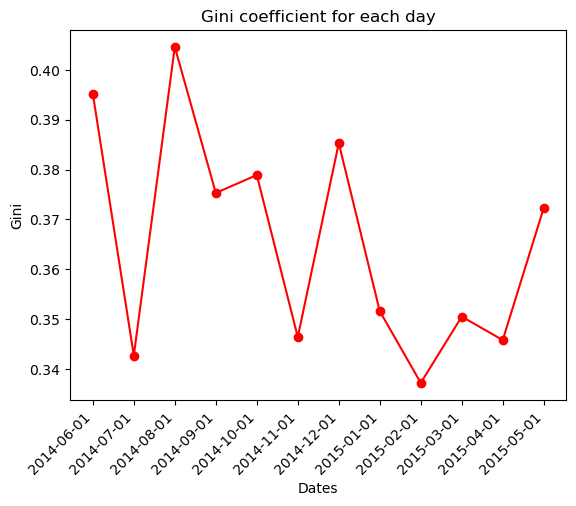

In [98]:

plt.xlabel('Dates')
plt.ylabel('Gini')
plt.title('Gini coefficient for each day')



plt.plot(dates, gini_by_date, color='red', marker='o', linestyle='-')
plt.xticks(rotation=45, ha='right')
plt.show()

В среднем на каждой из дат значение около 35% (то есть в пределах желтого и зеленого индикаторов), что в целом неплохой результат. Однако стоит иметь ввиду, что данные по датам распределены неоднородно, что может так же влиять на качество ранжирования модели

Тест M4.1: Сравнение прогнозного и фактического TR (Target Rate) на уровне выборки

Если брать изначальные результаты модели, выдаваемые функцией predict, то модель  фактически не определяет дефолтные кредиты. Попробуем подобрать thresholf такой, чтобы при вероятности 1 большей чем threshold заемщик будет объявлен дефолтным: сделаю это с помощью  массива test_v_pred, который является результатом работы функции predict_proba и соответсвует второму столбцу массива, возвращаемого функцией, который как раз содержит вероятности события "1".
Таким подбором получилось сделать разницу около 2 процентов в предсказании, что соответсвует зеленому индикатору в тесте

In [99]:

TR_fact = sum(target_val_woe)/len(target_val_woe)
TR_pred = sum(testv_cat)/len(testv_cat)
min_value = 10000
TR_pred_min = 0
j_min = 0
print('Доля дефолтных кредитов,  предсказанная моделью до подбора threshold:', TR_pred)
print('Изначальная ошибка в Target rate:',abs(TR_fact-TR_pred)/TR_fact)
for j in np.arange(0.1, 0.5, 0.005):
    testv_cat = 1*(testv_pred >= j)
    TR_pred = sum(testv_cat)/len(testv_cat)
    if abs(TR_fact-TR_pred)/TR_fact < min_value:
        min_value = abs(TR_fact-TR_pred)/TR_fact
        TR_pred_min = TR_pred
        j_min = j


print('Доля дефолтных кредитов,  предсказанная моделью после подбора threshold:',  TR_pred_min)
print('Фактическая доля дефолтных кредитов:', TR_fact)
print('Threshold:', j_min)
print('Значение относительной разности Target rate в процентах:', min_value*100)

Доля дефолтных кредитов,  предсказанная моделью до подбора threshold: 0.0023536041635589147
Изначальная ошибка в Target rate: 0.9866829222545249
Доля дефолтных кредитов,  предсказанная моделью после подбора threshold: 0.17897336449372647
Фактическая доля дефолтных кредитов: 0.1767357830706247
Threshold: 0.27000000000000013
Значение относительной разности Target rate в процентах: 1.2660602081965557


Калибровочная кривая


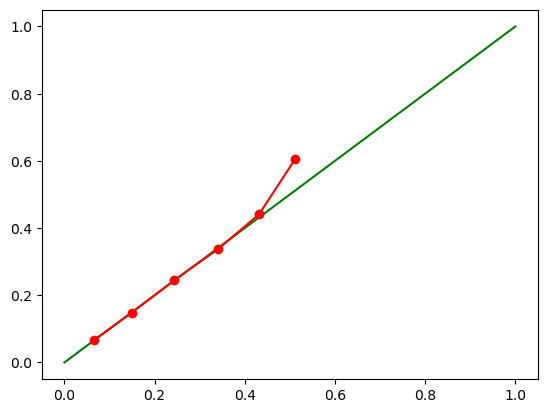

In [100]:
from sklearn.calibration import calibration_curve

prob_true, prob_pred = calibration_curve(target_val_woe,testv_pred, n_bins=10)

plt.plot([0,1], [0,1], color = 'green')
plt.plot(prob_pred, prob_true, color='red', marker='o', linestyle='-')



Я не поверила функции sklearn и решила построить калибровочную кривую сама, но результат получился точно таким же

In [101]:
calibration = pd.DataFrame()
calibration = pd.concat([X_valv_woe,pd.DataFrame(target_val_woe), pd.DataFrame(testv_pred)], axis =1)
calibration.rename(columns={0: 'pred_proba'}, inplace=True)

bins = np.linspace(0, 1, 11)  
calibration['bin'] = pd.cut(calibration['pred_proba'], bins, labels=False)
result_calibration= calibration.groupby('bin').agg({'def':'mean', 'pred_proba':'mean'}).reset_index()



In [102]:
result_calibration


bin       def  pred_proba
0    0  0.066972    0.066121
1    1  0.147788    0.149058
2    2  0.245112    0.243956
3    3  0.337986    0.341211
4    4  0.441176    0.431950
5    5  0.605263    0.511761

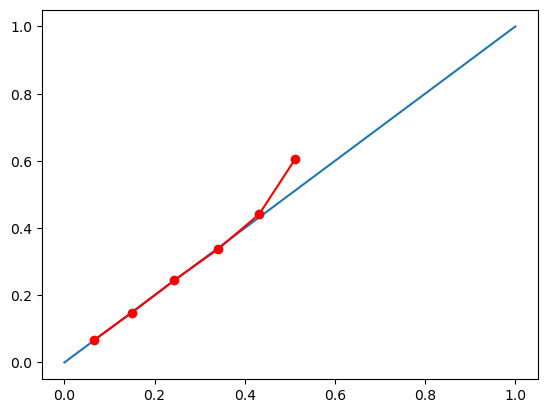

In [103]:

plt.plot([0,1], [0,1])
plt.plot(result_calibration['pred_proba'], result_calibration['def'], color='red', marker='o', linestyle='-')



# Другие модели машинного обучения ##

**Метод случайного леса (англ. random forest)** — алгоритм машинного обучения, заключающийся в использовании ансамбля решающих деревьев. 

Этот алгоритм основывается на том, что случайным образом строятся несколько деревьев решений, каждое из которых определяет значение класса таргетной переменной  (например, 0 или 1). После этого определяется предсказанное значение таргета : в условиях задачи классификации класс с наибольшим числом голосов от случайных деревье становится прогнозом алгоритма. 

Случайность в построении деревьев достигается таким образом: случайным образом выбираются с повторениями примеры из исходных данных, чтобы создать подвыборки для каждого дерева, далее эти подвыборки делятся на узлы дерева по одному на каждый, и так строится дерево решений различной глубины. Каждое дерево строится по своей подвыборке данных, и они работают независимо друг от друга.

По умолчанию в функции из библиотеки sklearn количество деревьев в лесу - 10.

У функции ```RandomForestClassifier``` существует несколько параметров, но остановимся подробнее на двух основных:
- n_estimators (по умолчанию: 10): Этот параметр указывает количество деревьев в случайном лесе. Большее число деревьев может улучшить качество модели, но также может увеличить время обучения.

- max_depth (по умолчанию: None): Этот параметр ограничивает максимальную глубину каждого дерева в случайном лесе. Если установлено значение None, деревья не будут ограничены по глубине.


Попробуем подобрать эти параметры с помощью рандомизированного поиска

In [104]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import roc_auc_score
# n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]

# param_dist = {'n_estimators': n_estimators,
#                'max_depth': max_depth}
# model_forest = RandomForestClassifier(random_state=0)
# rs = RandomizedSearchCV(estimator = model_forest, param_distributions=param_dist, cv=cv, scoring='roc_auc')
# rs.fit(Xtr_scaled, y_train)
# rs.best_params_

In [105]:
# rs.best_score_

In [106]:
# model_forest = RandomForestClassifier(max_depth=rs.best_params_['max_depth'], n_estimators=rs.best_params_['n_estimators'])
# model_forest.fit(Xtr_scaled,y_train)

# y_pred_proba_rf = model_forest.predict_proba(df_val_woe)[:, 1]
# perf_woe_rf = sc.perf_eva(y_val, y_pred_proba_rf, plot_type = ["roc"], title = "test")

# print('Gini coeff test with Random Forest =' , perf_woe_rf['Gini'])

Как мы видим, коэффициент Джини остался примерно на том же уровне, что и в случае с логистической регрессией с использованием Woe-преобразований

## Подбор гиперпараметров с помощью библиотеки Optuna ##


Возможно, качество модели можно улучшить, если чуть лучше подобрать гиперпараметры: для проверки этого предположения попробую подобрать гиперпараметры для двух моделей машинного обучения - логистической регрессии и 

In [107]:
!pip install optuna -q


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [108]:
import optuna
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [109]:
MLMODEL = "Log"


In [110]:
#сделаю отдельную функцию, которая сразу будет предсказывать значения на валидационном датасете
def printresults(model):
  if MLMODEL == "Log":
    #обучаю на валидационном датасете
    y_pred = model.predict_proba(testv_woe)[:, 1]
    testv_perf_woe = sc.perf_eva(target_val_woe, y_pred, plot_type = ["roc"], title = "test")
    gini_coef_val = testv_perf_woe['Gini']
    print('Gini coeff test  =' , testv_perf_woe['Gini'])
  if MLMODEL == "RandFor":
    #обучаю уже на валидационном датасете, причем без woe-преобразований
    y_pred = model.predict_proba(Xval_scaled)[:, 1]
    testv_perf_woe = sc.perf_eva(y_val, y_pred, plot_type = ["roc"], title = "test")
    gini_coef_val = testv_perf_woe['Gini']
    print('Gini coeff test  =' , testv_perf_woe['Gini'])
  

In [111]:

def optimize(trial):
  if MLMODEL == "Log":
    model_opt = LogisticRegression(
        C = trial.suggest_float("C", 1e-5, 1e5)
      )
    model_opt.fit(train_woe, y_train_woe)
    y_pred = model_opt.predict_proba(test_woe)[:, 1]
    return roc_auc_score(y_val_woe, y_pred)
  if MLMODEL == "RandFor":
    n_estimators = trial.suggest_int('n_estimators', 100, 310, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 3, 7, 1)
    max_depth = trial.suggest_int('max_depth', 15, 40, 1)

    model_opt = RandomForestClassifier(n_estimators=n_estimators,
                                          max_depth=max_depth,
                                          min_samples_leaf=min_samples_leaf
                                          )
 
    model_opt.fit(Xtr_scaled,y_train)

    y_pred = model_opt.predict_proba(Xval_scaled)[:, 1]
    return roc_auc_score(y_val_woe, y_pred)

In [112]:
study_logreg = optuna.create_study(study_name="LogisticRegression Optuna Optimization", 
                                   direction="maximize",

                                   )
study_logreg.optimize(optimize, n_trials=25
                    
                      )

print("Наилучшие значения гиперпараметров {}".format(study_logreg.best_params))
print("Roc_auc на тестовой выборке: {:.2f}".format(study_logreg.best_value))

[I 2024-05-10 12:35:00,420] A new study created in memory with name: LogisticRegression Optuna Optimization
[I 2024-05-10 12:35:00,521] Trial 0 finished with value: 0.6991291176734584 and parameters: {'C': 98412.41959895112}. Best is trial 0 with value: 0.6991291176734584.
[I 2024-05-10 12:35:00,601] Trial 1 finished with value: 0.6991291176734584 and parameters: {'C': 70053.2284573478}. Best is trial 0 with value: 0.6991291176734584.
[I 2024-05-10 12:35:00,682] Trial 2 finished with value: 0.6991291176734584 and parameters: {'C': 40933.34335348214}. Best is trial 0 with value: 0.6991291176734584.
[I 2024-05-10 12:35:00,758] Trial 3 finished with value: 0.6991291176734584 and parameters: {'C': 44367.62783279522}. Best is trial 0 with value: 0.6991291176734584.
[I 2024-05-10 12:35:00,839] Trial 4 finished with value: 0.6991291176734584 and parameters: {'C': 35980.166092765285}. Best is trial 0 with value: 0.6991291176734584.
[I 2024-05-10 12:35:00,921] Trial 5 finished with value: 0.699

Наилучшие значения гиперпараметров {'C': 673.863589193541}
Roc_auc на тестовой выборке: 0.70


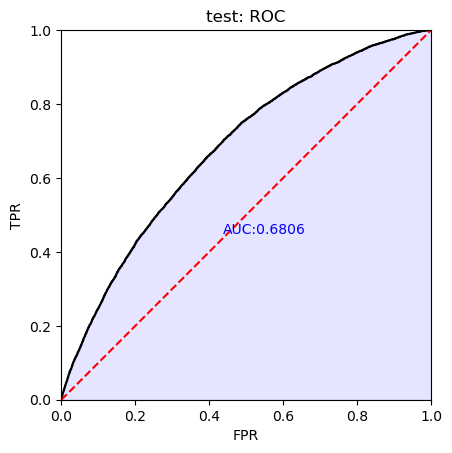

Gini coeff test  = 0.3612


In [113]:
model_optuna = LogisticRegression(**study_logreg.best_params,random_state=42)
model_optuna.fit(train_woe, y_train_woe)

printresults(model_optuna)

In [114]:
MLMODEL = "RandFor"


In [115]:
study_randfor = optuna.create_study(study_name="RandomForest Optuna Optimization", 
                                   direction="maximize",

                                   )
study_randfor.optimize(optimize, n_trials=25
                    
                      )

print("Наилучшие значения гиперпараметров {}".format(study_randfor.best_params))
print("Roc_auc на тестовой выборке: {:.2f}".format(study_randfor.best_value))

[I 2024-05-10 12:35:08,987] A new study created in memory with name: RandomForest Optuna Optimization
/var/folders/q2/14m9wqwd7blcr7txyywgdkkm0000gn/T/ipykernel_18964/2593865203.py:10: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/var/folders/q2/14m9wqwd7blcr7txyywgdkkm0000gn/T/ipykernel_18964/2593865203.py:11: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

/var/folders/q2/14m9wqwd7blcr7txyywgdkkm0000gn/T/ipykernel_18964/2593865203.py:12: FutureWarning:

suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.

[I 2024-05-10 12:35:17,803] Trial 0 finished with value: 0.677774436765102 and parameters: {'n_estimators': 120, 'min_samples_leaf': 5, 'max_depth': 33}. Best is trial 0 with value: 0.677774436765102.
/var/folders/q2/14m9wqwd7blcr7txyywgdkkm0000gn/T/ipykernel_18964/25938652

Наилучшие значения гиперпараметров {'n_estimators': 270, 'min_samples_leaf': 4, 'max_depth': 15}
Roc_auc на тестовой выборке: 0.69


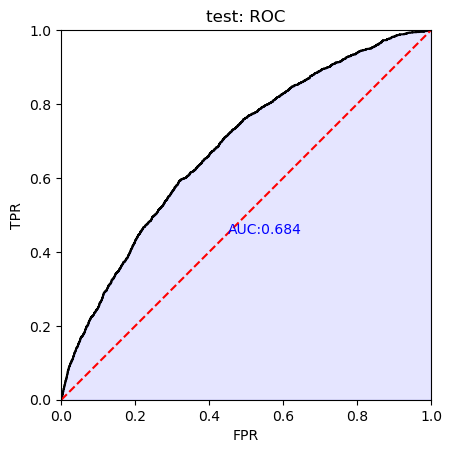

Gini coeff test  = 0.3679


In [116]:
model_optuna = RandomForestClassifier(**study_randfor.best_params,random_state=42)
model_optuna.fit(Xtr_scaled,y_train)

printresults(model_optuna)

## Подсчет ожидаемой прибыли ##


*надо пояснить текстом

In [162]:
df_start_woe = sc.woebin_ply(df_train_woe, bins_adj)

[INFO] converting into woe values ...


In [172]:

def benefit_plot(model, woe_dataset, woe_target,validation_woe_dataset, validation_target ,testdataset_beforewoe, valdataset_beforewoe, lgd):
    plt.figure(figsize=(10,8))
    
    colors = ['olivedrab', 'deepskyblue', 'salmon']
    
    max_val = []
    for it, i in enumerate(['train', 'val']):
        if i == 'train':
            X = woe_dataset
            y = woe_target
            fund = testdataset_beforewoe
        elif i == 'val':
            X = validation_woe_dataset
            y =  validation_target
            fund = valdataset_beforewoe
        benefit = []    
        acceptance_rate = []
        y_hat = model.predict_proba(X)[:, 1]
        profit_df = pd.DataFrame()
        thr = np.linspace(0, 1, 50)
        
        for t in thr:
            acceptance_rate.append(t)
            y_pred = [1 if prob >= t else 0 for prob in y_hat]
            profit_df['model'] = y_pred
            profit_df['actual'] = y
            profit_df['expected_profit']  = fund['installment'] * fund['term'] - fund['funded_amnt']
            
            profit_df.loc[(profit_df['model'] == 0) & (profit_df['actual'] == 0), 'actual_profit'] = profit_df['expected_profit']
            profit_df.loc[(profit_df['model'] == 0) & (profit_df['actual'] == 1), 'actual_profit'] = -lgd*fund['funded_amnt']
            profit_df.loc[(profit_df['model'] == 1) & (profit_df['actual'] == 0), 'actual_profit'] = 0

            
            
            benefit.append(profit_df['actual_profit'].sum())
    
        print('Model', i, 'Max Benefit: ', np.max(benefit)) 
    
        plt.plot(acceptance_rate, benefit, label=i, color=colors[it], linewidth=2)  
        plt.plot(acceptance_rate[np.argmax(benefit)], np.max(benefit), color=colors[it], marker='*', markersize=10)
         
    plt.xlabel('Acceptance rate')
    plt.ylabel('Benefit')
    plt.title('Benefit curve for model')
    plt.legend(bbox_to_anchor=(1, 1))
    _ = plt.legend(loc=0, prop={'size': 16})


Model train Max Benefit:  71507728.6
Model val Max Benefit:  52418441.639999986


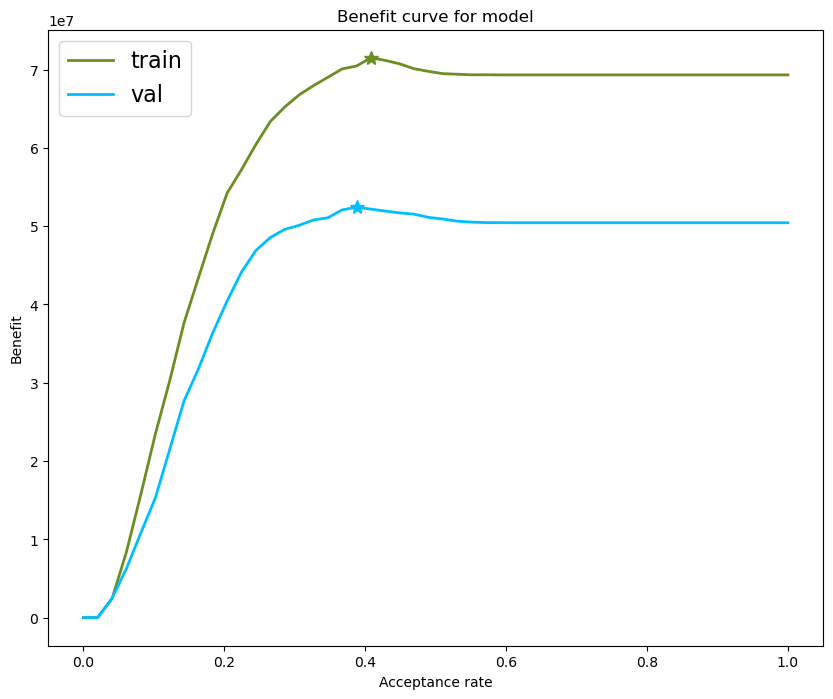

In [173]:
benefit_plot(model_woe, df_start_woe, target, testv_woe, target_val_woe,df_train_woe,X_valv_woe, 1)

Model train Max Benefit:  99549768.16
Model val Max Benefit:  83856205.04


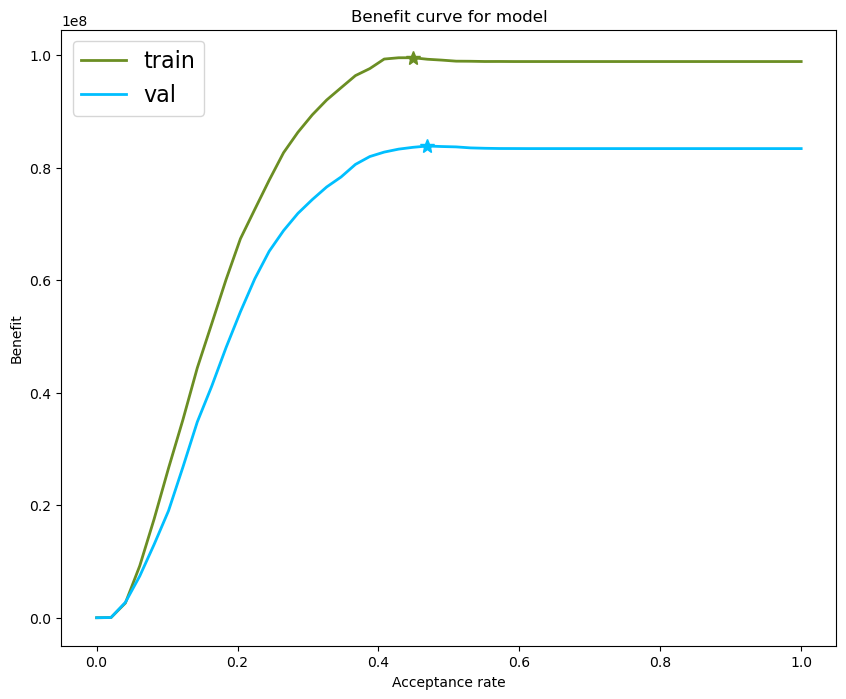

In [174]:
benefit_plot(model_woe, df_start_woe, target, testv_woe, target_val_woe,df_train_woe,X_valv_woe, 0.8)